### 아나콘다에서 패키지 설치

1. `ModuleNotFoundError: No module named 'seaborn'` 모듈이 없다는 에러가 뜨면,
2. 구글에서 "anaconda 모듈명" 검색
3. 대부분 'ANACONDA CLOUD' 검색결과 링크가 첫번째 결과에 뜸
4. "To install this package with conda ruh:" 다음에 `conda install -c anaconda 패키지명`과 같은 형식으로 나오는 부분 카피해서 터미널에서 실행

In [1]:
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 한글 깨짐 방지
if platform.system() == 'Darwin':
    # 맥일때
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    # 윈도우일때
    plt.rcParams["font.family"] = 'Malgun Gothic'
# 마이너스기호(-) 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# train data와 test data 둘다 확인하기 위해 read
train = pd.read_csv("data_titanic/train.csv")
test = pd.read_csv("data_titanic/test.csv")

### 변수 설명
* Survived: 생존 여부 => 0 = No, 1 = Yes
* Pclass: 티켓 등급 => 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex: 성별
* Age: 나이
* Sibsp: 함께 탑승한 형제자매, 배우자의 수(# of siblings / spouses aboard the Titanic)
* Parch: 함께 탑승한 부모, 자식의 수(#of parents / children aboard the Titanic)
* Ticket: 티켓 번호
* Fare: 운임
* Cabin: 객실 번호
* Embarked: 탑승 항구 => C = Cherbourg, Q = Queenstown, S = Southampton

### 입력 데이터 vs. 출력 데이터

1. X : Y
2. 독립변수(independent variable) : 종속변수(dependent variable)
3. 설명변수 : 반응변수, 예측변수 : 결과변수 ...
3. feature(특징), label(개, 고양이...)

In [3]:
# train data NaN값 확인
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# test data NaN값 확인
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### feature 선택
* 나이(age)         : 결측값이 train, test에 많이 포함되어 있고, 나이는 주요 생존 예측 별수이므로 채우는 것으로 결정
* 객실번호(cabin)    : 생존 예측에 의미있는 값인지 확인 후 해당 칼럼은 버리는 것으로 결정
* 탑승항구(embarked) : 2개 밖에 결측값이 없으므로 해당 샘플을 삭제해도 무방하나 채우는 것으로 결정
* 티켓요금(fare)     : test에 1개의 결측치발견, 답안 제출을 위해 삭제하면 안될것 같음, 최빈값 채우기로 결정

In [5]:
# cabin에 어떤 값이 들어있는지 확인
train.Cabin.head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [6]:
# 객실번호 카운트
train.Cabin.value_counts().head(20)

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
F33            3
D              3
C22 C26        3
E101           3
C68            2
F G73          2
C124           2
E24            2
B51 B53 B55    2
E44            2
F4             2
C83            2
D35            2
C52            2
E8             2
E67            2
Name: Cabin, dtype: int64

In [7]:
# 역시 cabin은 버리는 걸로, 데이터프레임에서 완전 삭제
del train["Cabin"]
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [8]:
# test data에서도 삭제
del test["Cabin"]
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
# train data 탑승 항구 확인
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# test data 탑승 항구 확인
test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [11]:
# S(Southampton) 항구가 가장 많이 탑승한 것으로 확인됨
# S로 채우는 것으로 결정, 채우고 나면 644명에서 646명으로 2명 증가
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

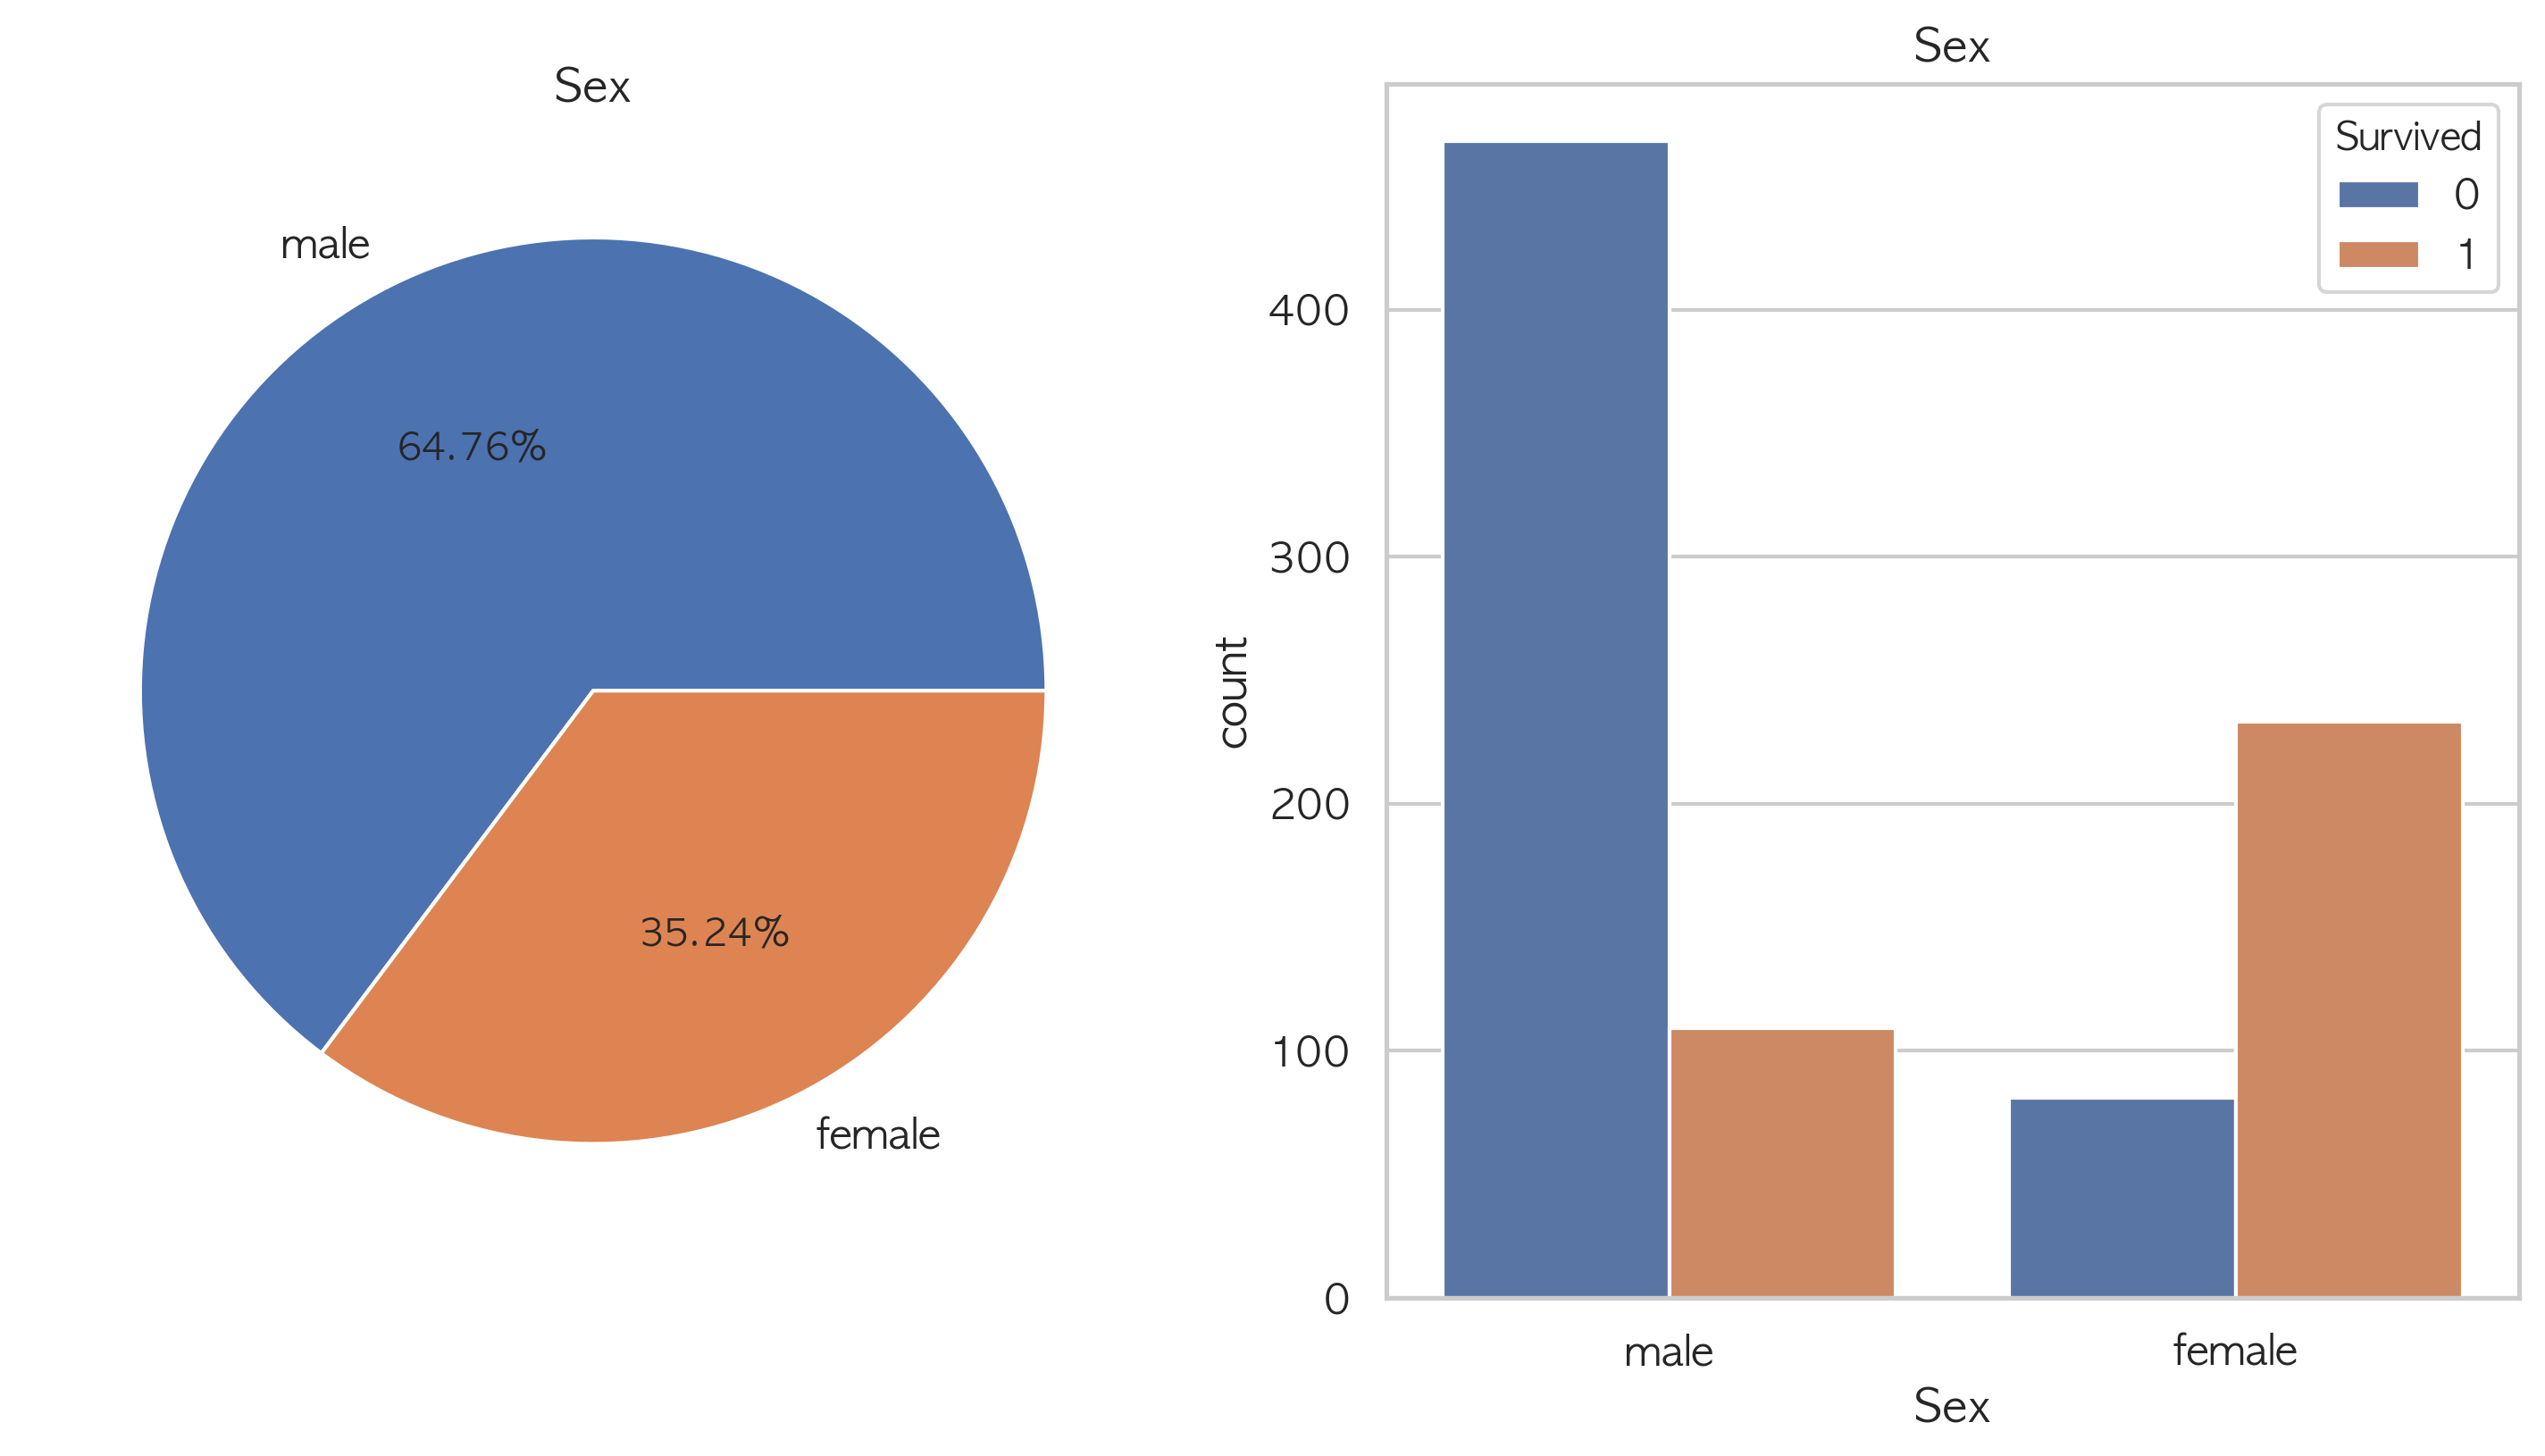

In [12]:
# 성별 기준 생존자 확인
# 남성이 여성보다 생존률이 많이 낮음
# feature값으로 사용하기로 결정

f,ax=plt.subplots(1,2,figsize=(12,6))

train['Sex'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Sex')
ax[0].set_ylabel('')

sns.countplot('Sex', hue="Survived", data=train, ax=ax[1])
ax[1].set_title('Sex')
plt.show()

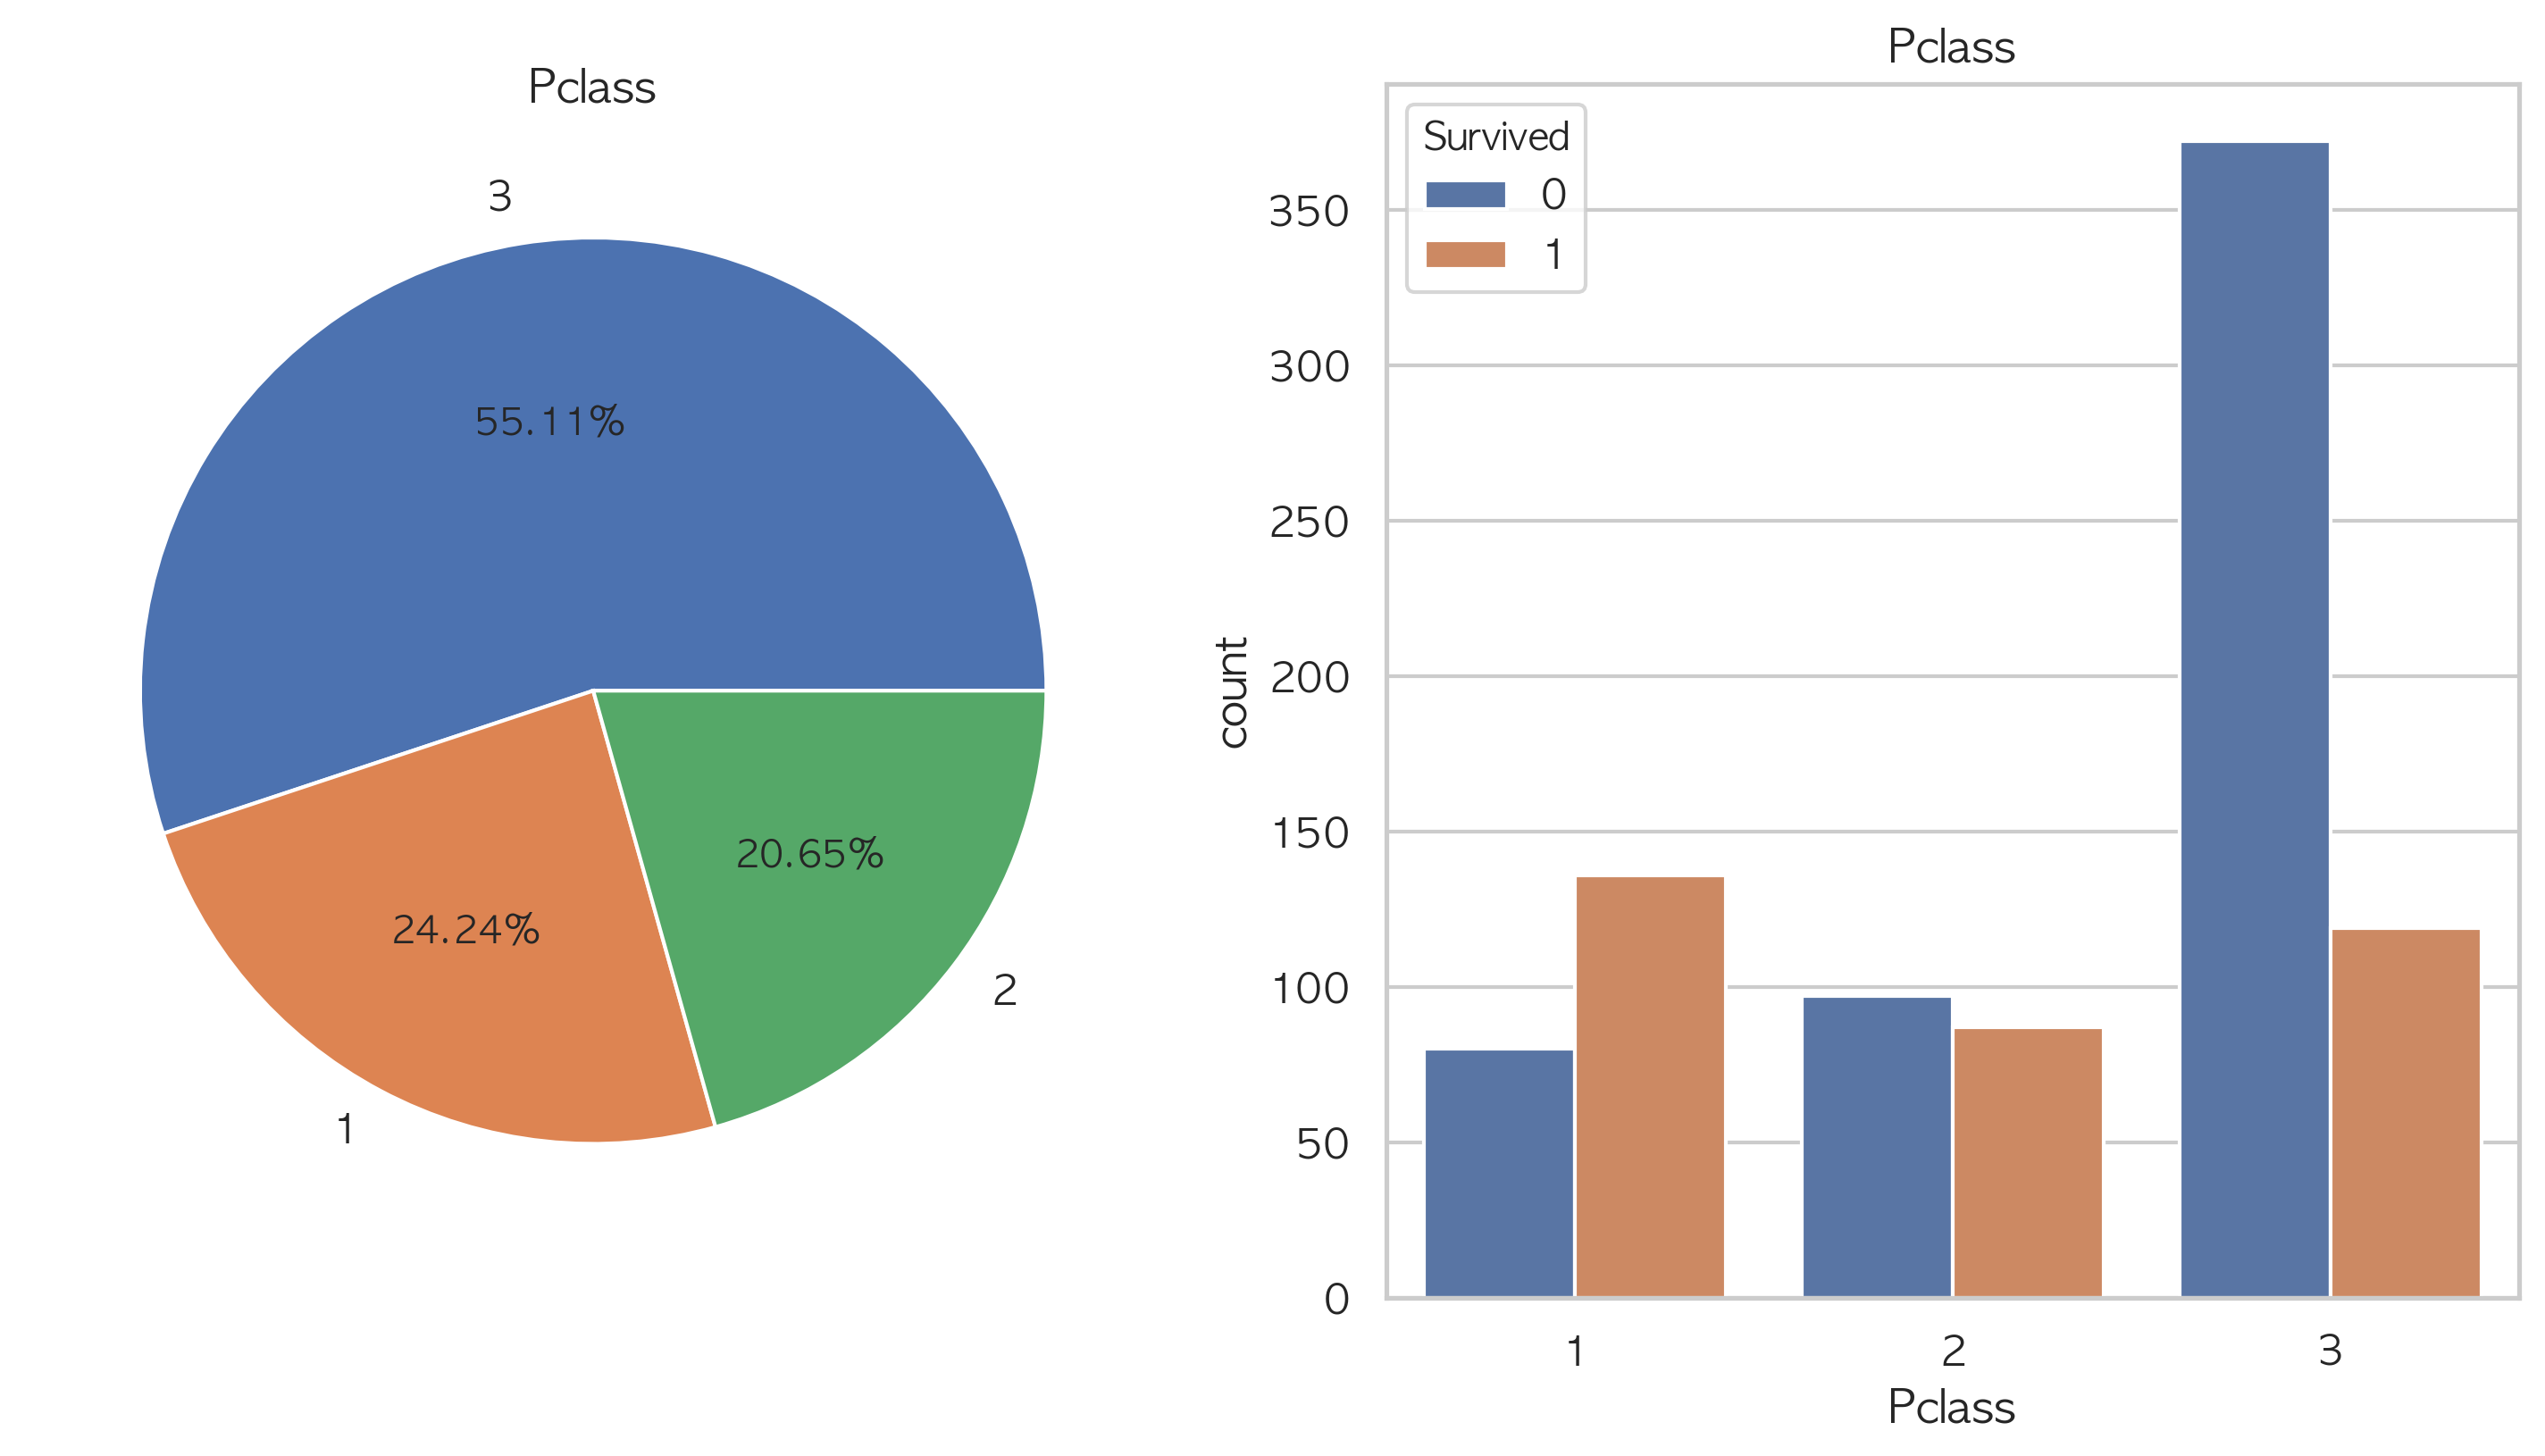

In [13]:
# 티켓 등급으로 확인
# 1, 2등급에 비해 3등급 사망자 많음
# feature로 활용하기로 결정

# column_name 변수 정의해서 손쉽게 칼럼명 바꿔가면서 그래프 확인하도록 수정
column_name = "Pclass"
f,ax=plt.subplots(1,2,figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Survived", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [14]:
# 나이대 파생변수 추가, 10씩 증가
train["Age_group"] = pd.cut(train.Age,
                                bins = [0, 10, 20, 30, 40, 50, 60, 70, 80],
                                right = True) # 오른쪽 값 포함, 20살이면 11~20, default

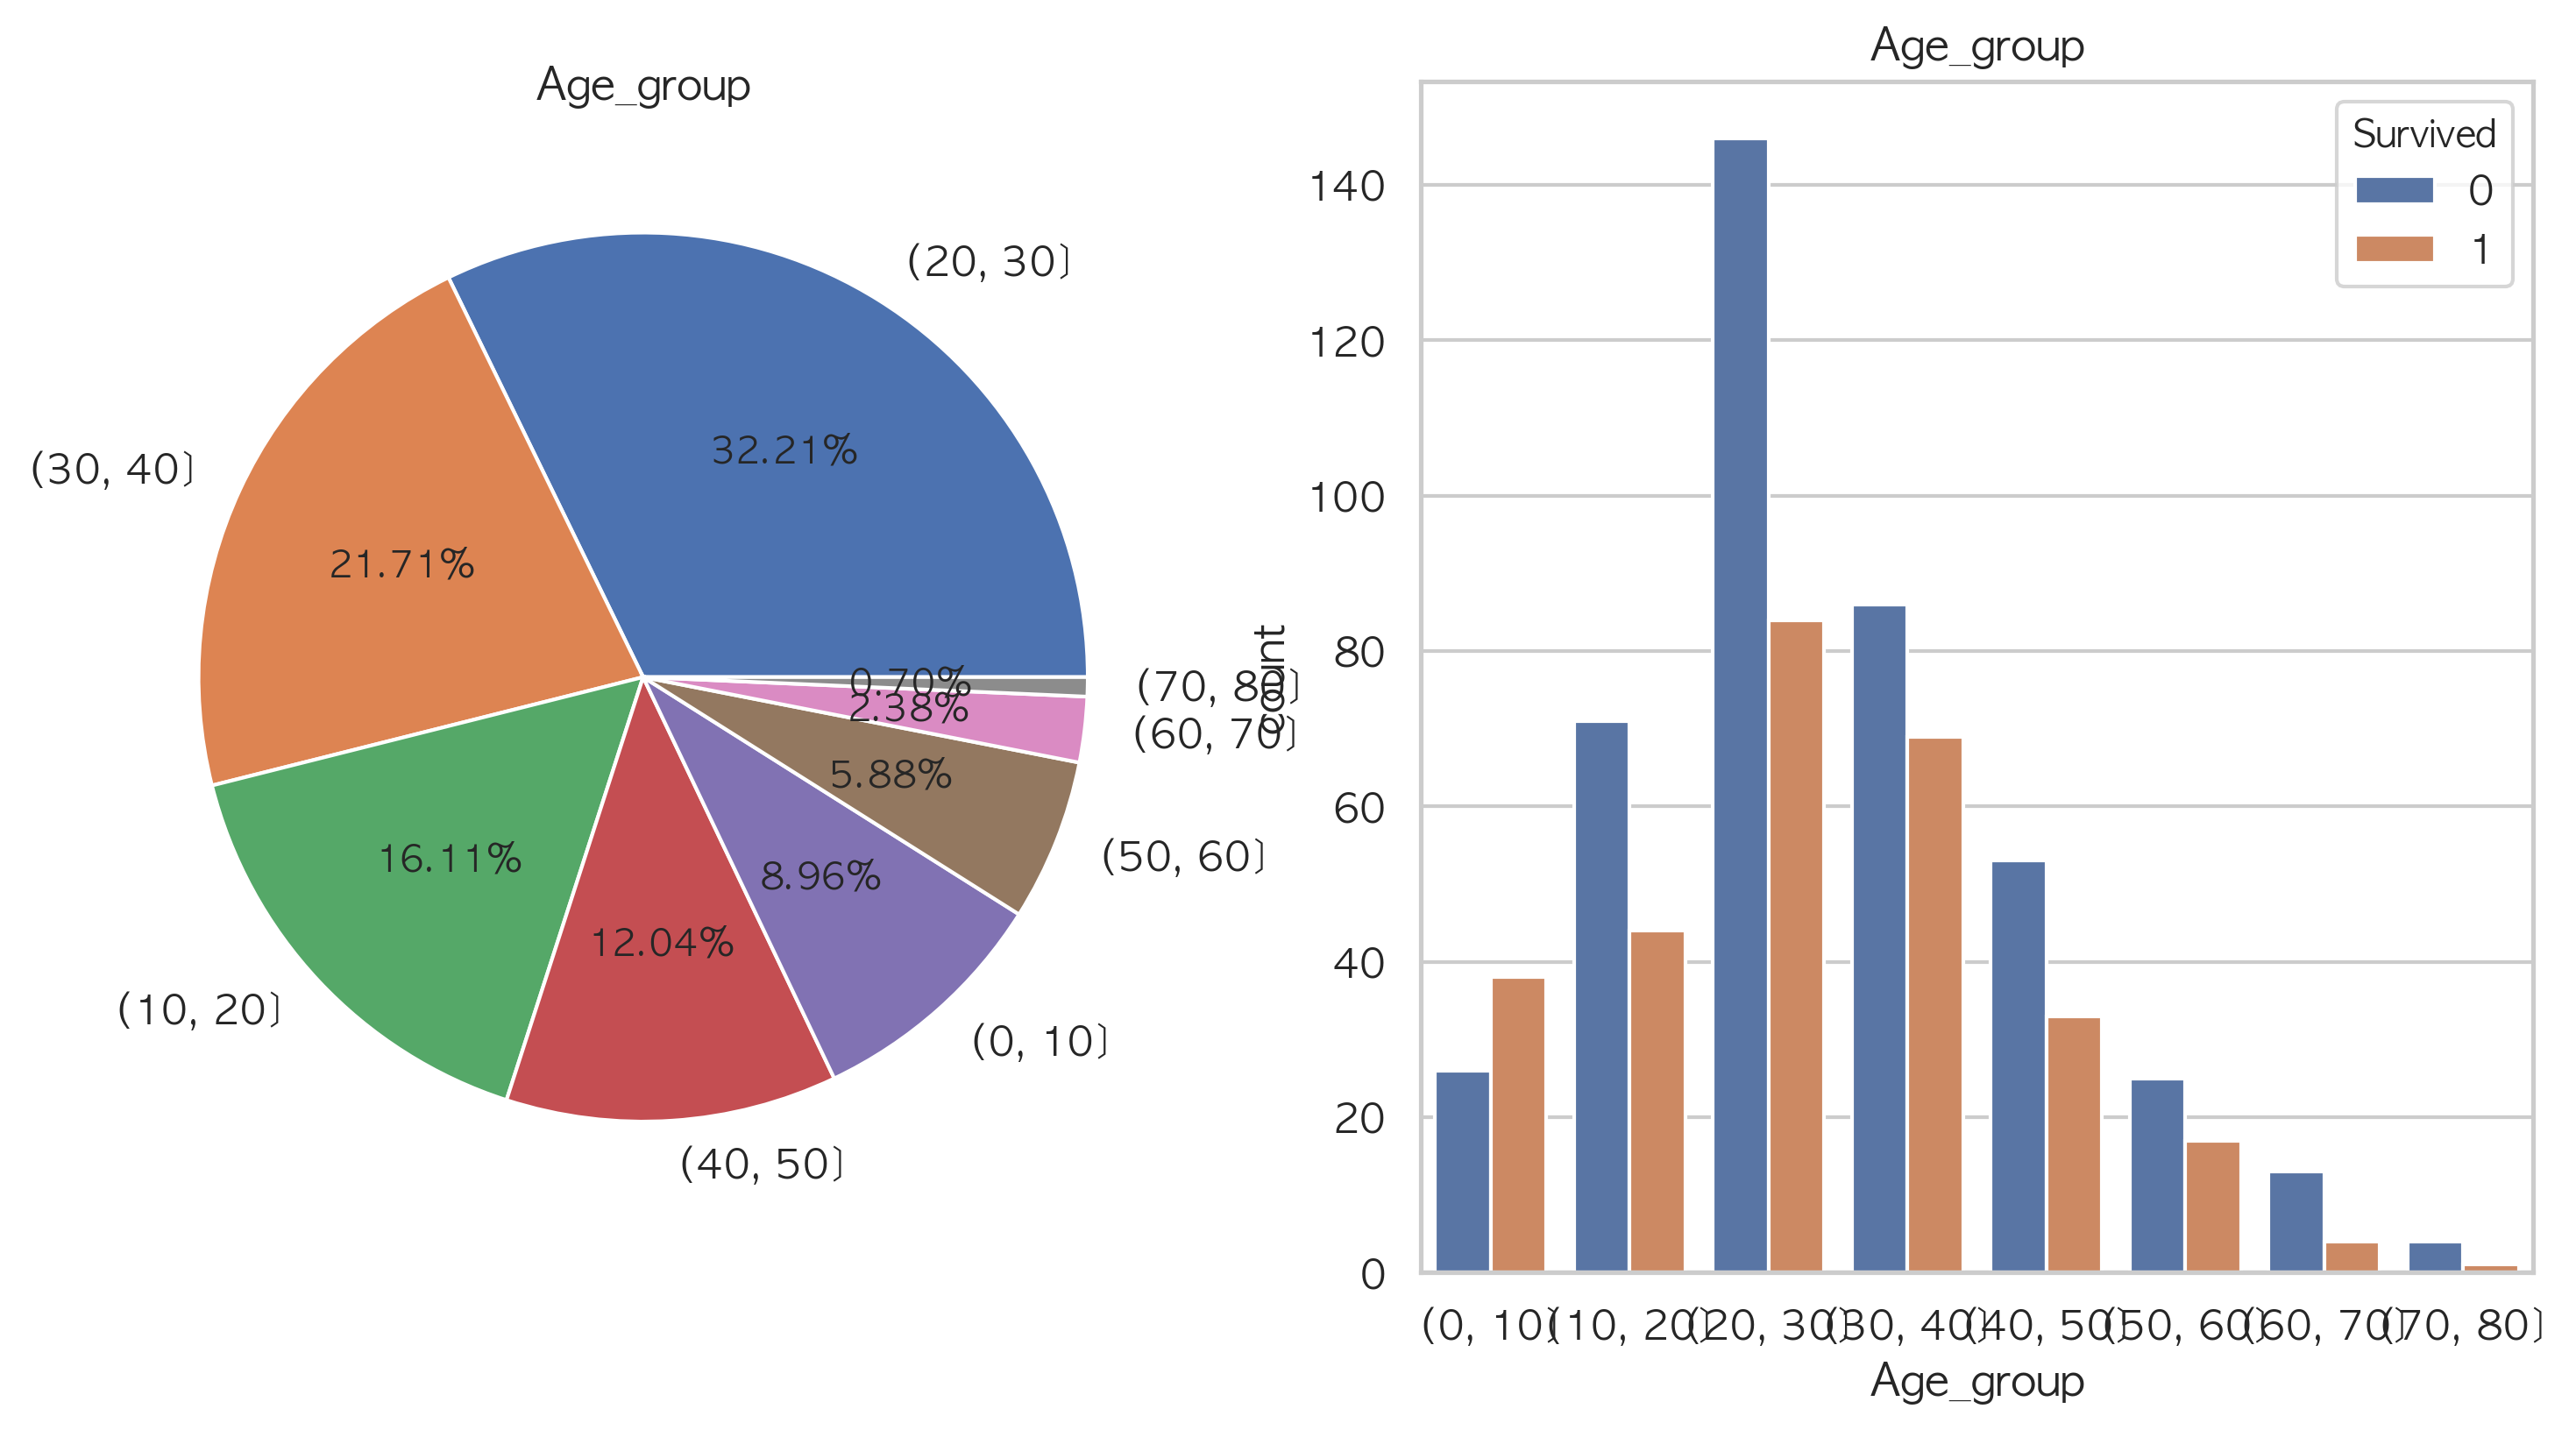

In [15]:
# 나이와 생존률 확인
# 20~30대에 특히 사망자 많음
# feature로 활용하기로 결정

column_name = "Age_group"
f,ax=plt.subplots(1,2,figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Survived", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

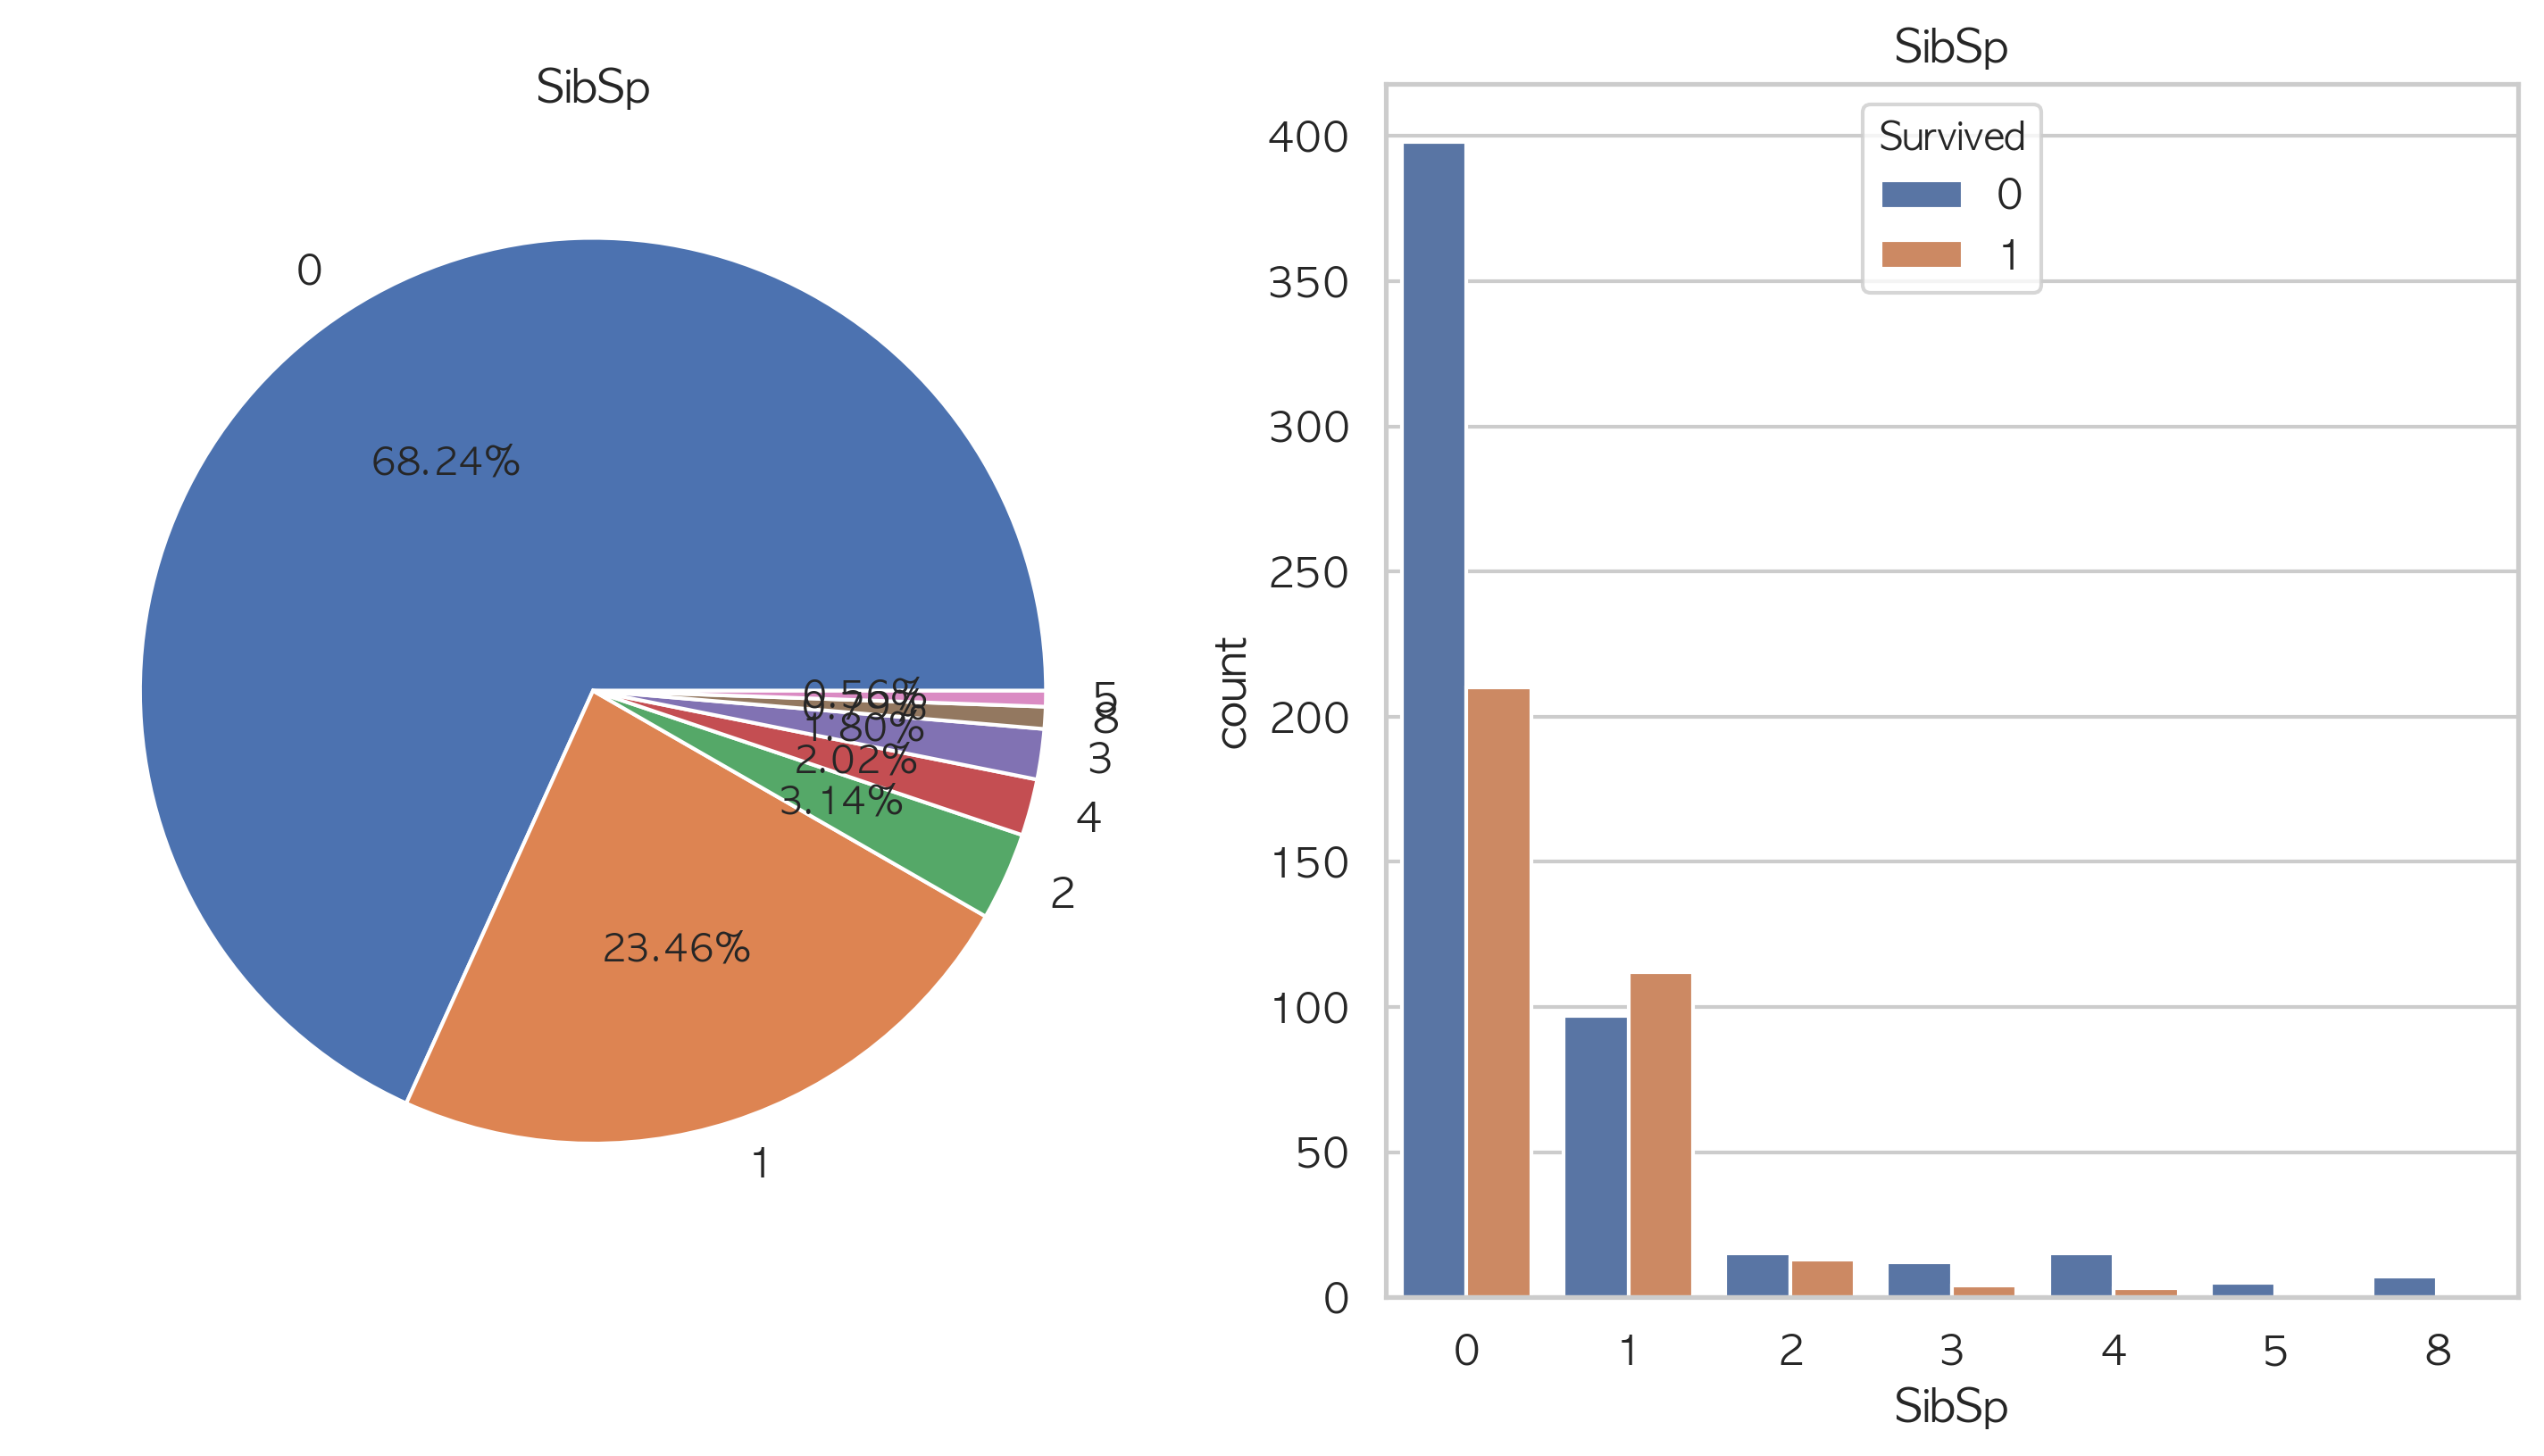

In [16]:
# 함께 탑승한 형제자매, 배우자 수로 생존률 확인
# 혼자 탑승한 경우 사망자가 많음
# feature값으로 활용

column_name = "SibSp"
f,ax=plt.subplots(1,2,figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Survived", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

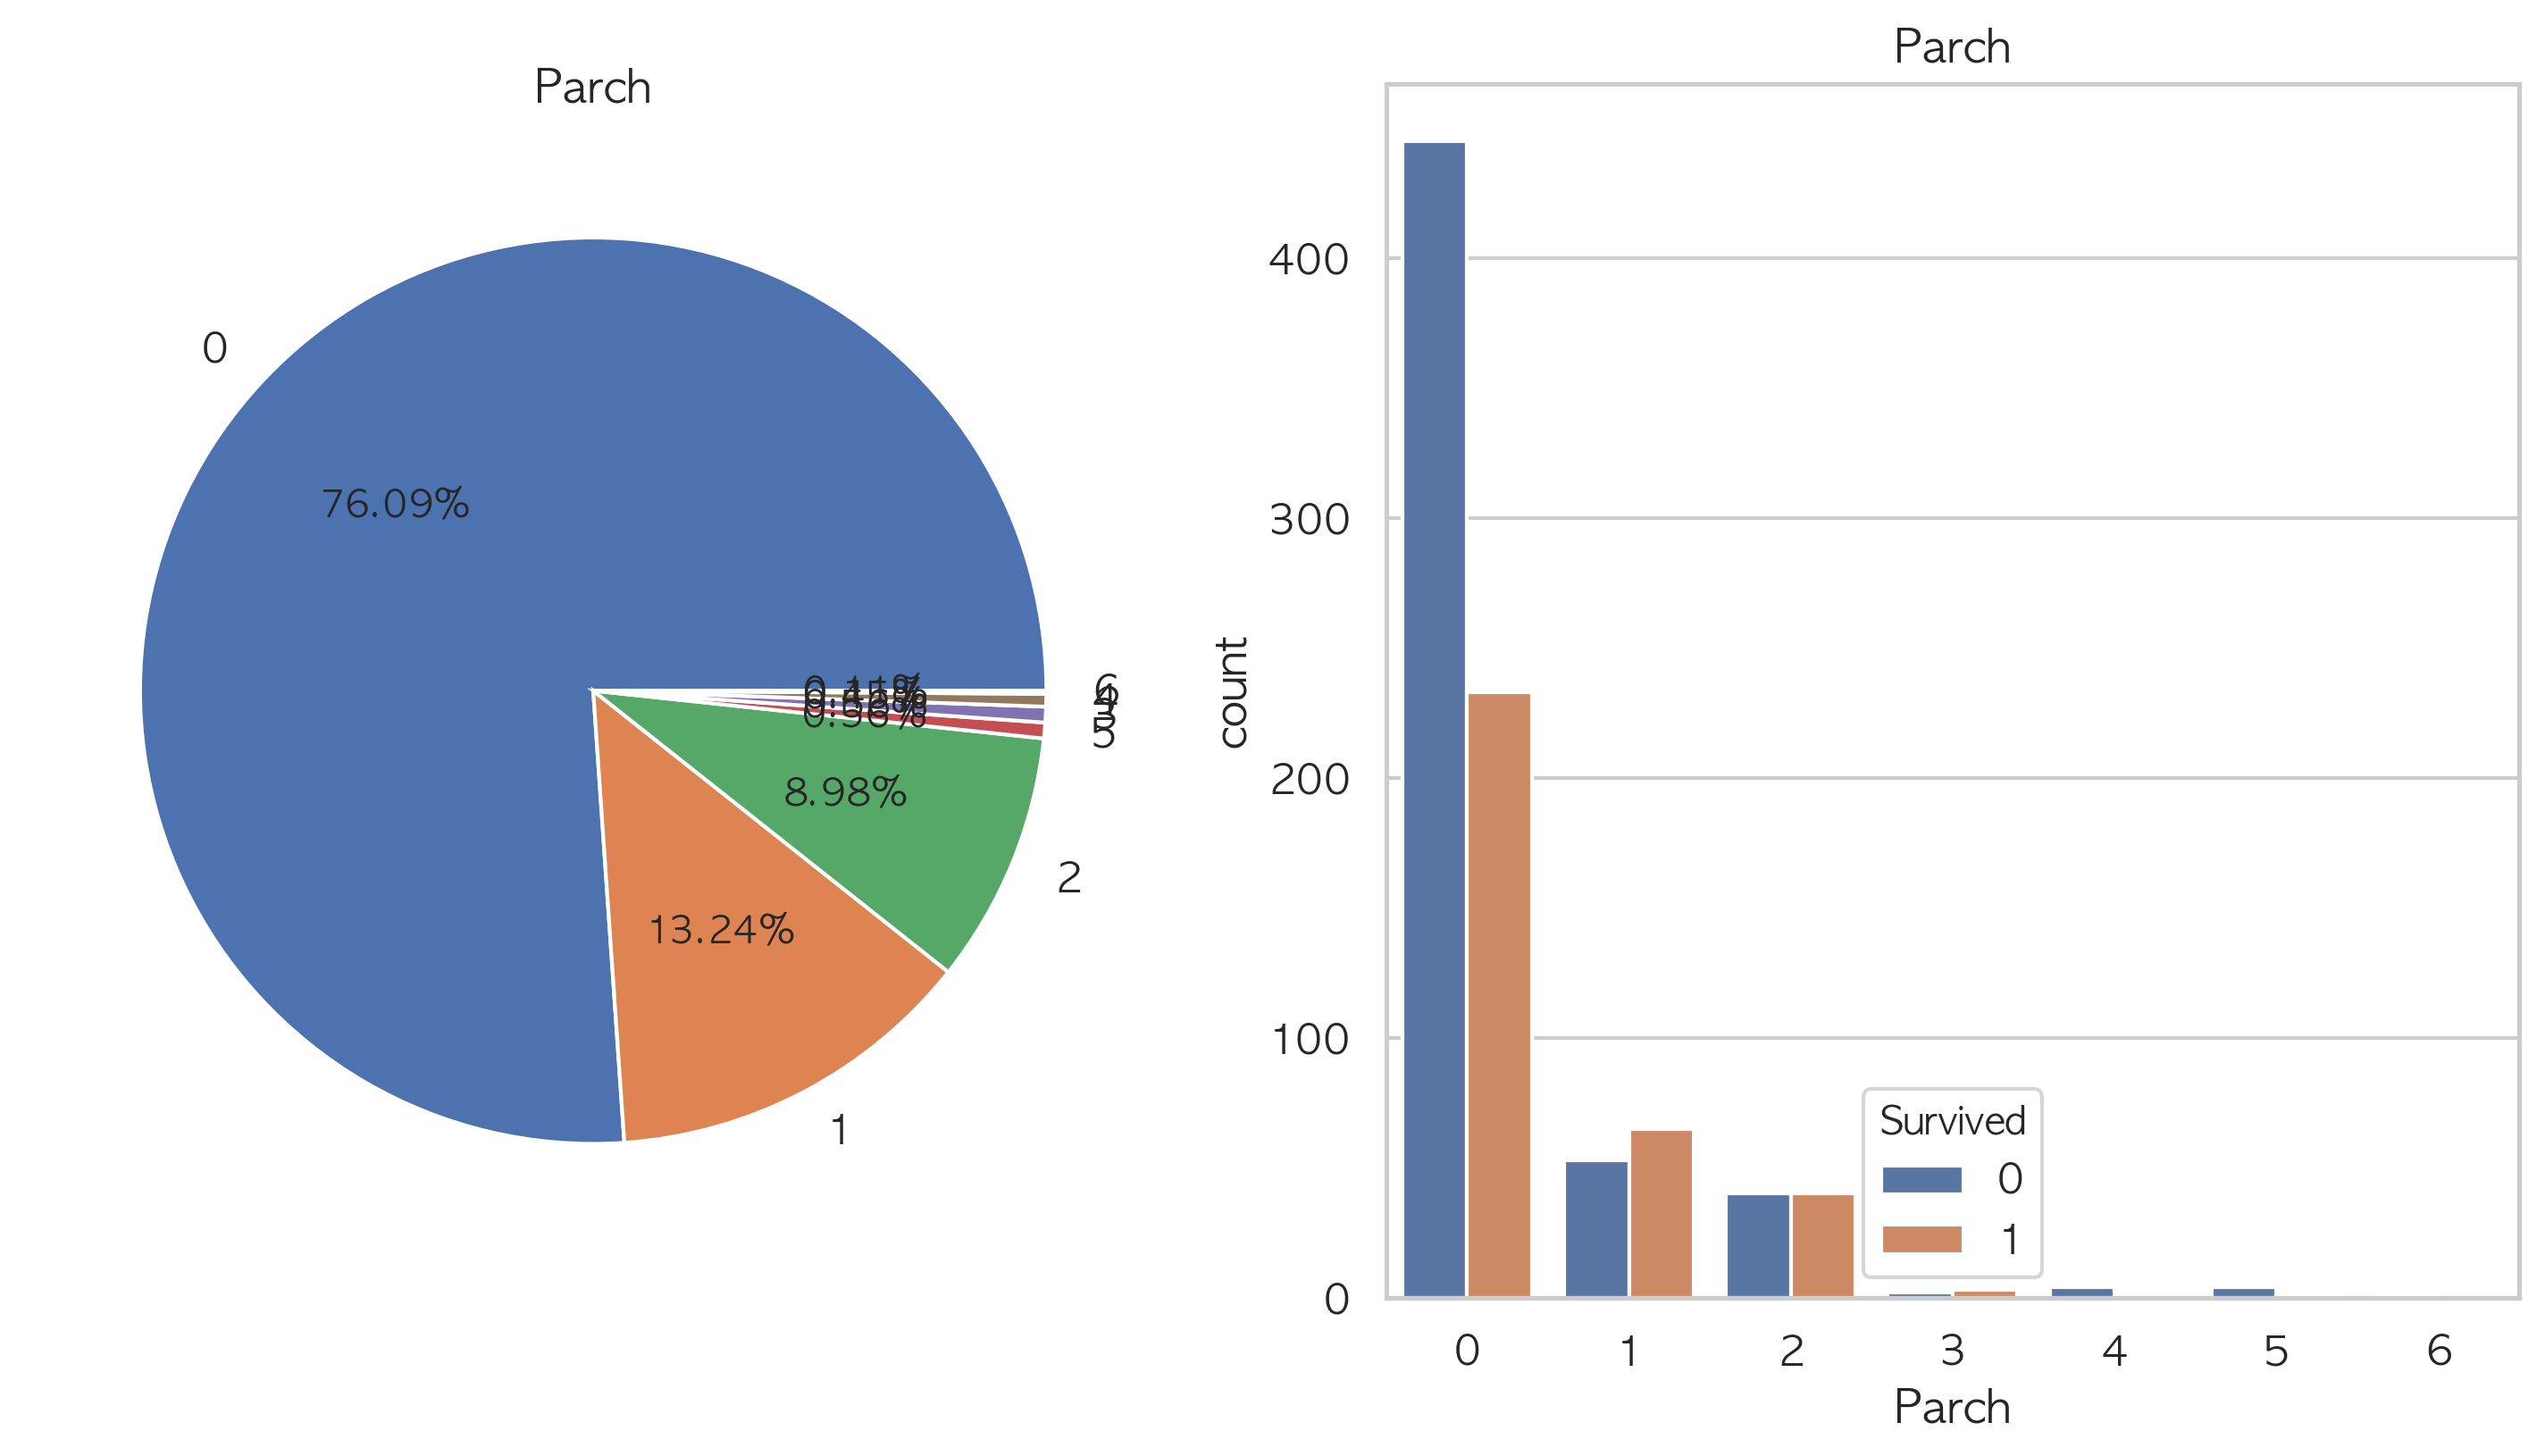

In [17]:
# 함께 탐승한 부모, 자식의 수와 생존률 확인
# 형제자매, 배우자 수와 같이 혼자 탑승한 경우 생존률 낮음
# feature값으로 활용

column_name = "Parch"
f,ax=plt.subplots(1,2,figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Survived", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [18]:
# 티켓 번호 카운트
train.Ticket.value_counts().head(20)

1601            7
347082          7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
113760          4
19950           4
347077          4
113781          4
PC 17757        4
4133            4
349909          4
LINE            4
17421           4
W./C. 6608      4
2666            4
371110          3
Name: Ticket, dtype: int64

In [19]:
# 티켓 번호도 객실 번호와 마찬가지로 생존 예측에 사용하지 않는 것으로 결정
# 데이터프레임에서 삭제
del train["Ticket"]
del test["Ticket"]
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Age_group'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [20]:
# 요금 최소값, 최대값 확인
# 무료로 탑승한 경우도 있음
print("fare_min : {}".format(train.Fare.min()))
print("fare_max : {}".format(train.Fare.max()))

fare_min : 0.0
fare_max : 512.3292


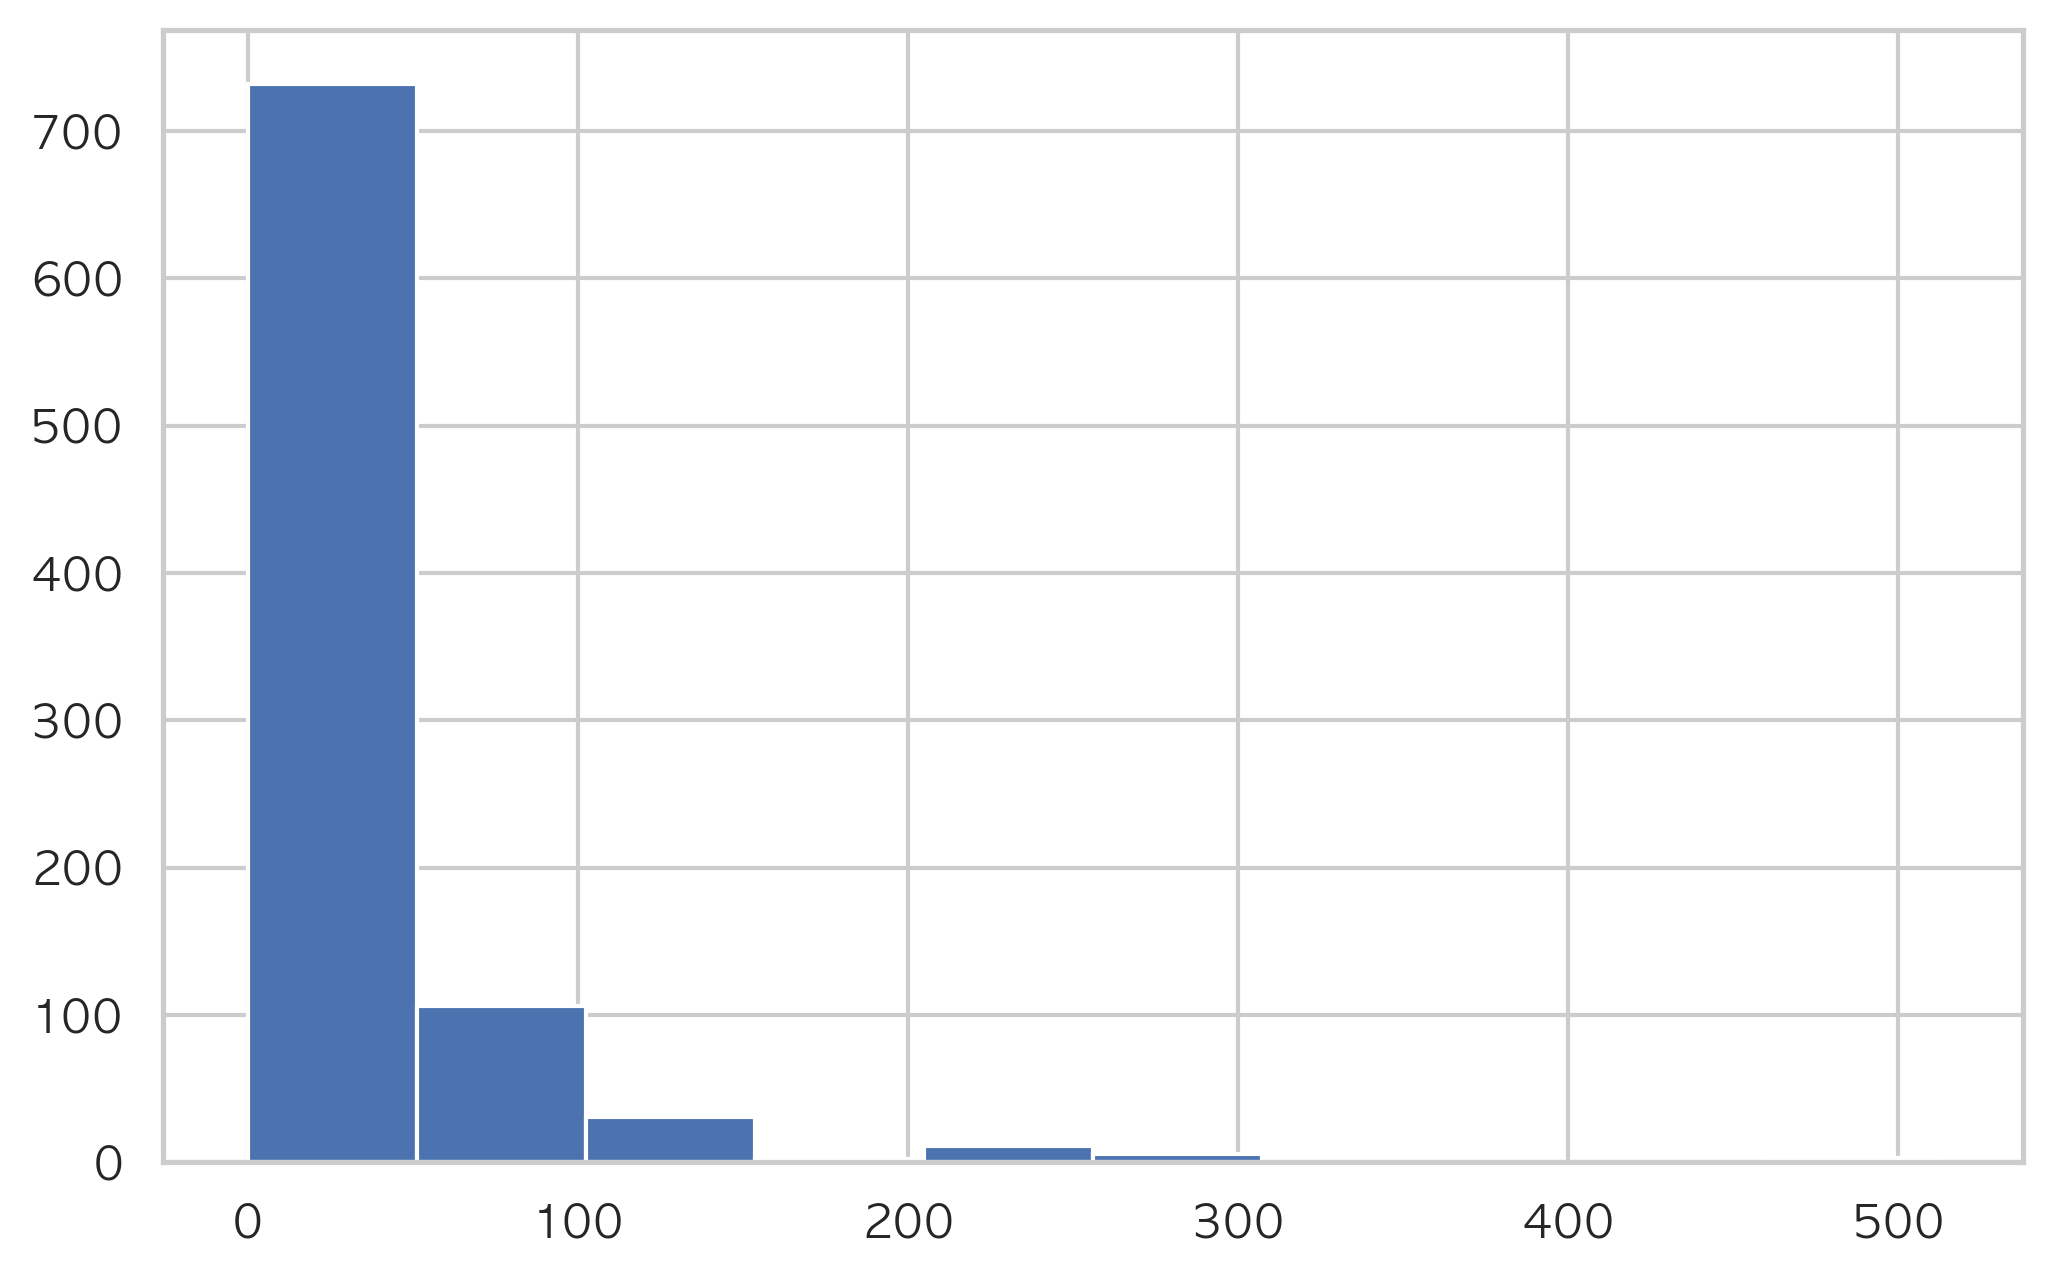

In [21]:
# 요금 히스토그램 확인
# 100 이하에 대부분 분포
plt.hist(train["Fare"])
plt.show()

In [22]:
# 요금대 파생변수 추가
train["Fare_group"] = pd.cut(train.Fare,
                                bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                                right = False) # 요금 0이 포함되어야 하므로 right = False로 처리, 왼쪽값 포함, 즉 0 ~ 49가 됨

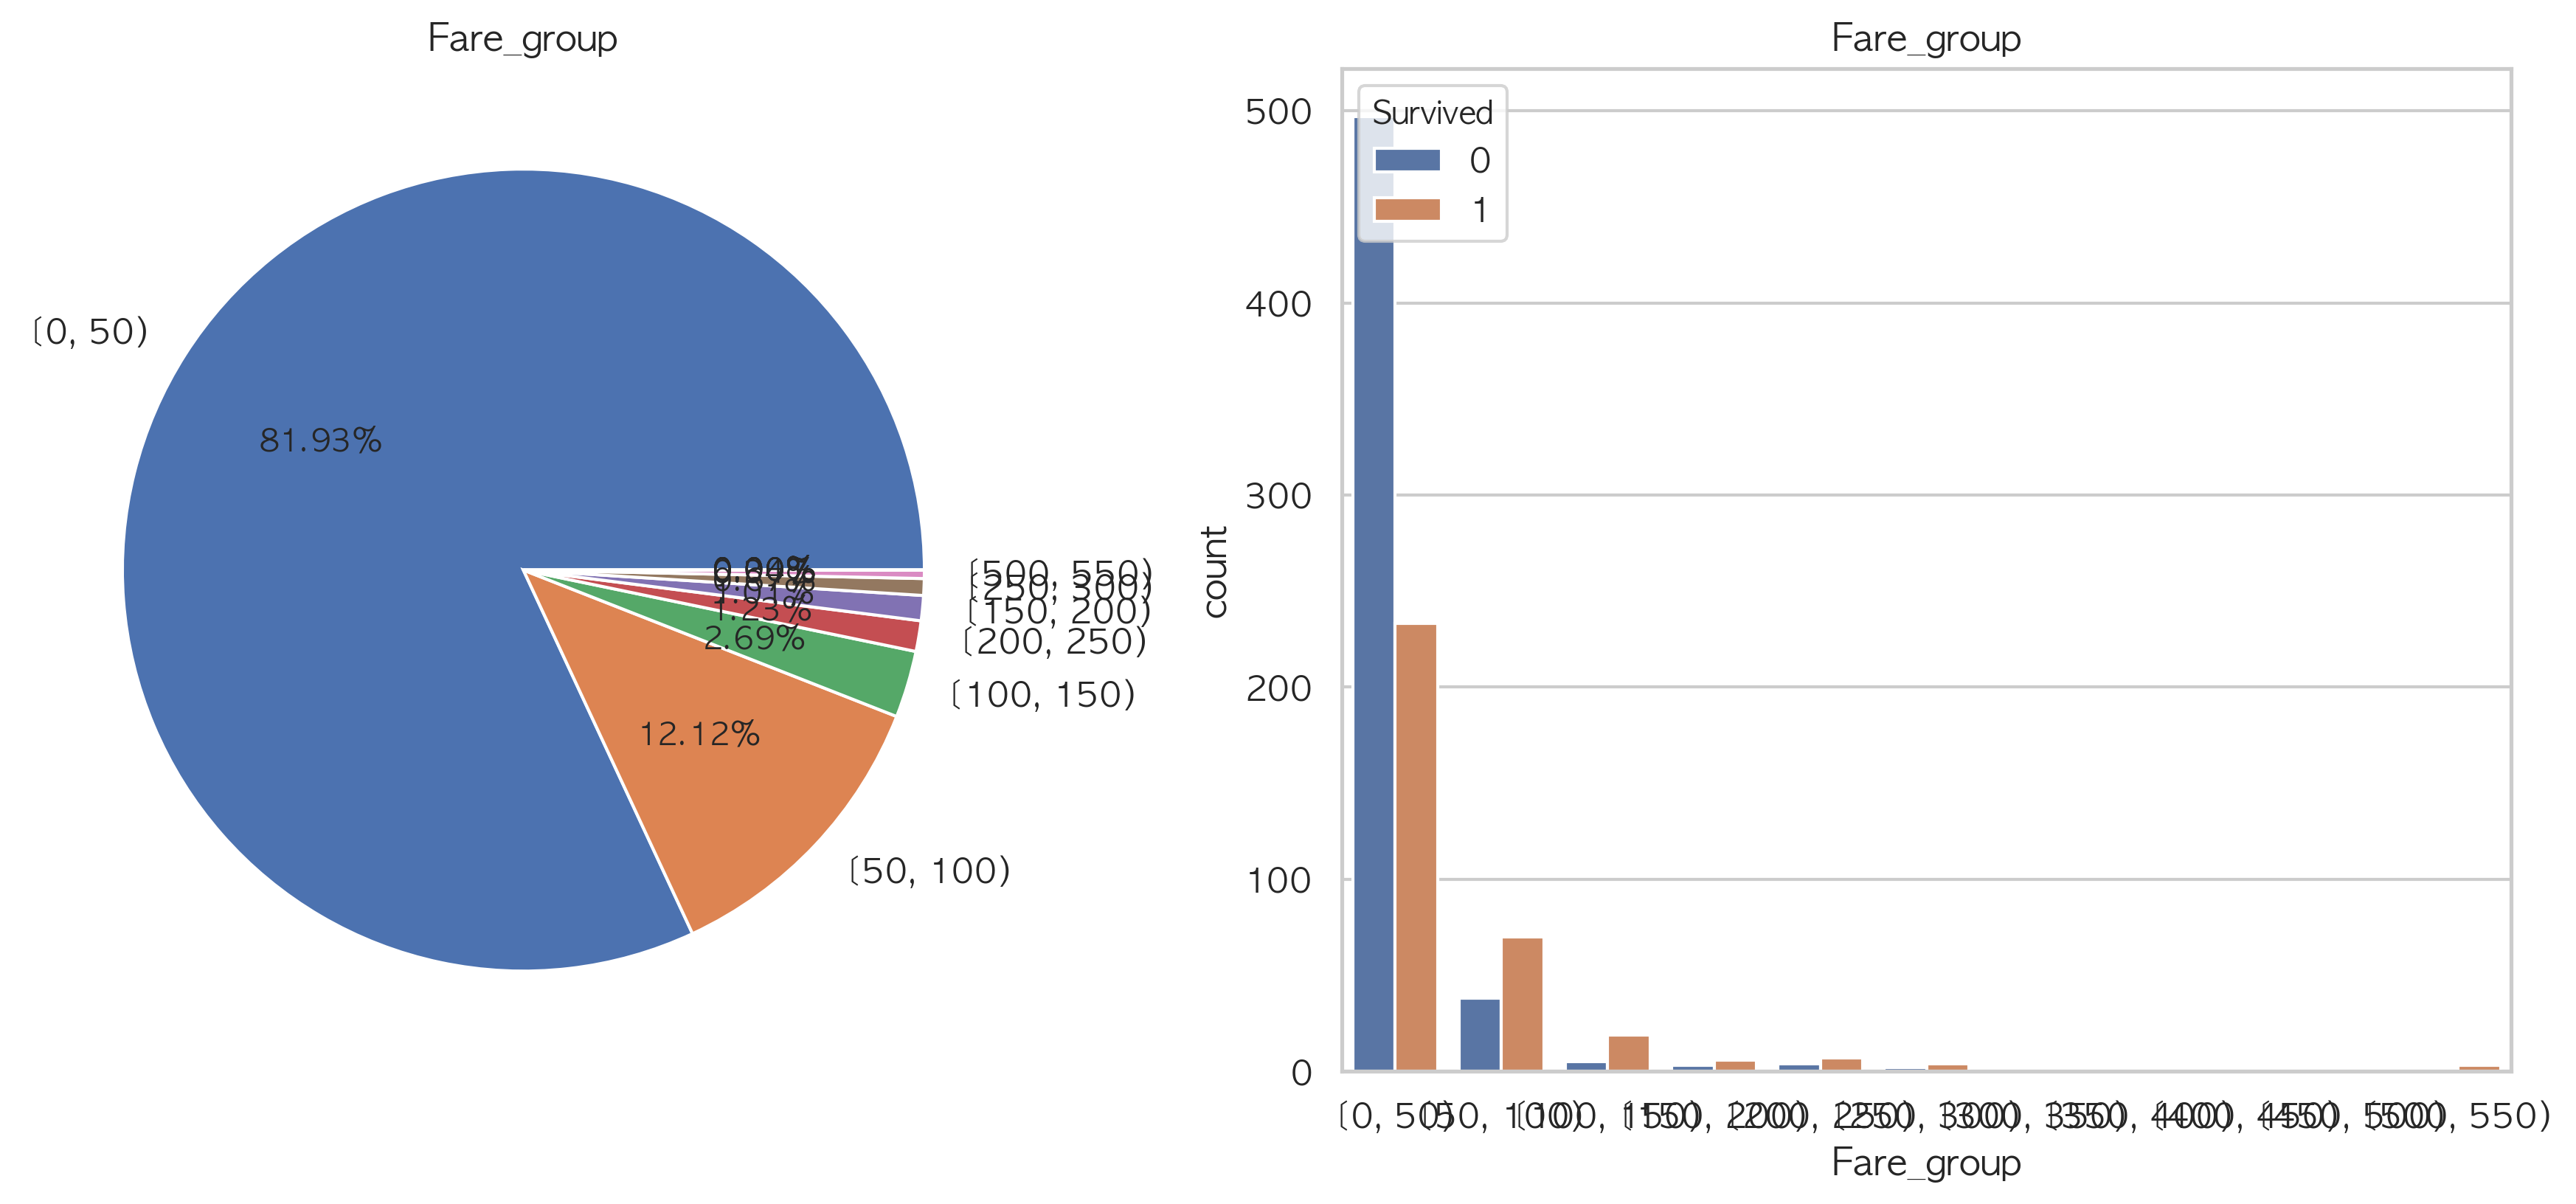

In [23]:
# 요금대로 생존여부 확인
# 50이하 요금이 사망자 많음
column_name = "Fare_group"
f,ax=plt.subplots(1,2,figsize=(15,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Survived", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

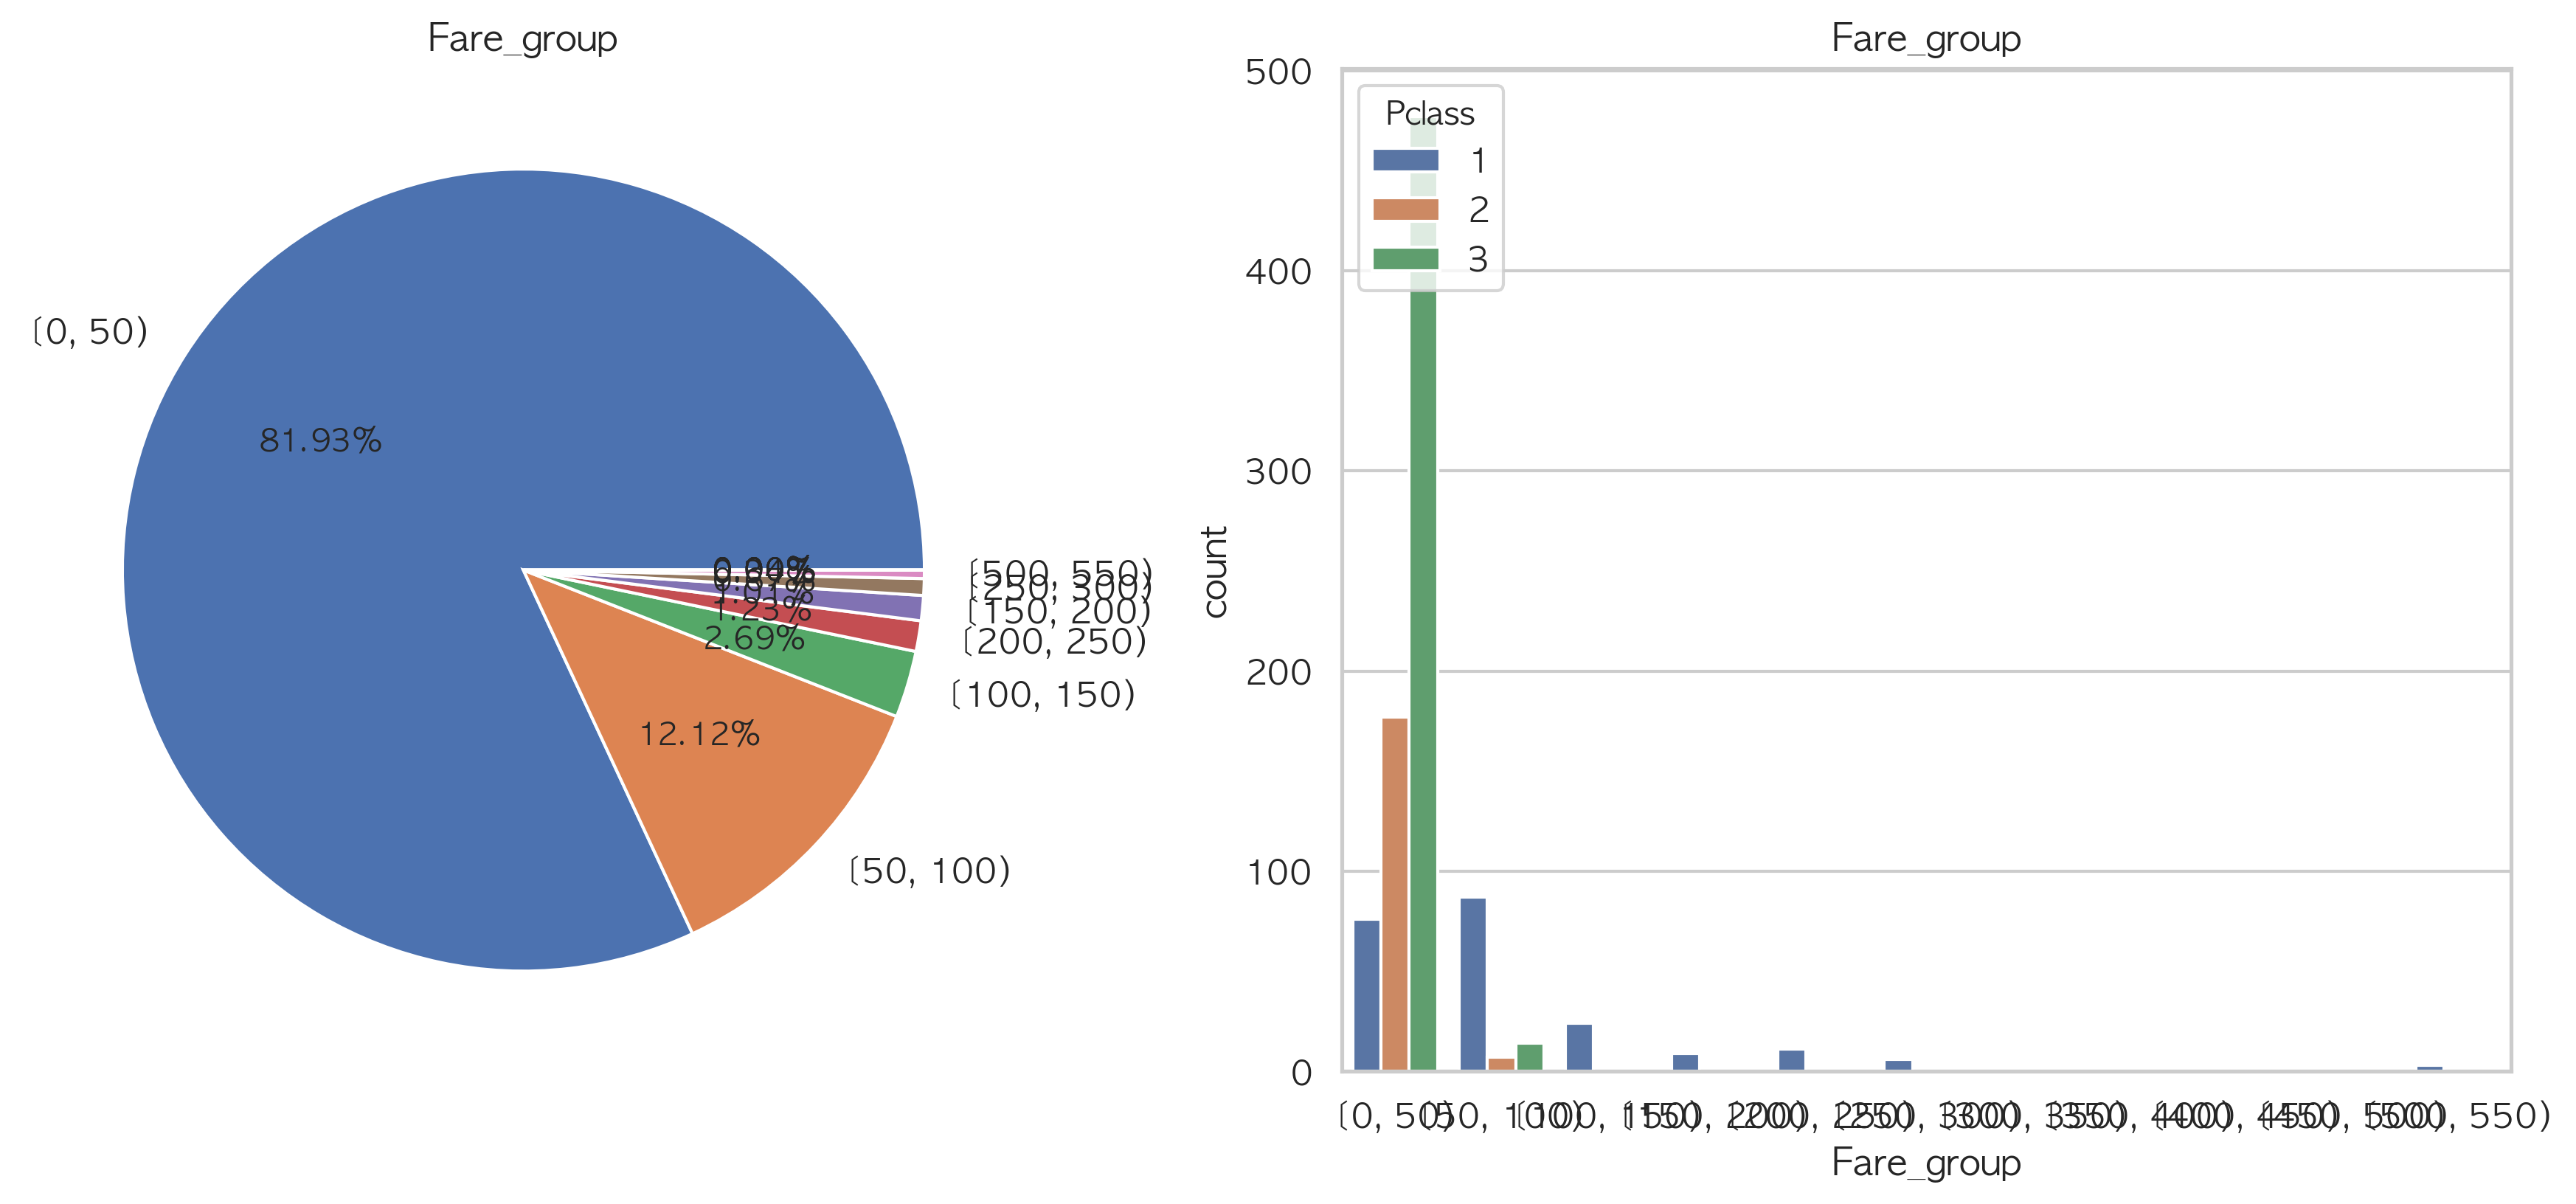

In [24]:
# 요금과 객실등급 상관관계 확인
# 3등급 객실은 대부분 객실요금 50이하로 확인
column_name = "Fare_group"
f,ax=plt.subplots(1,2,figsize=(15,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Pclass", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

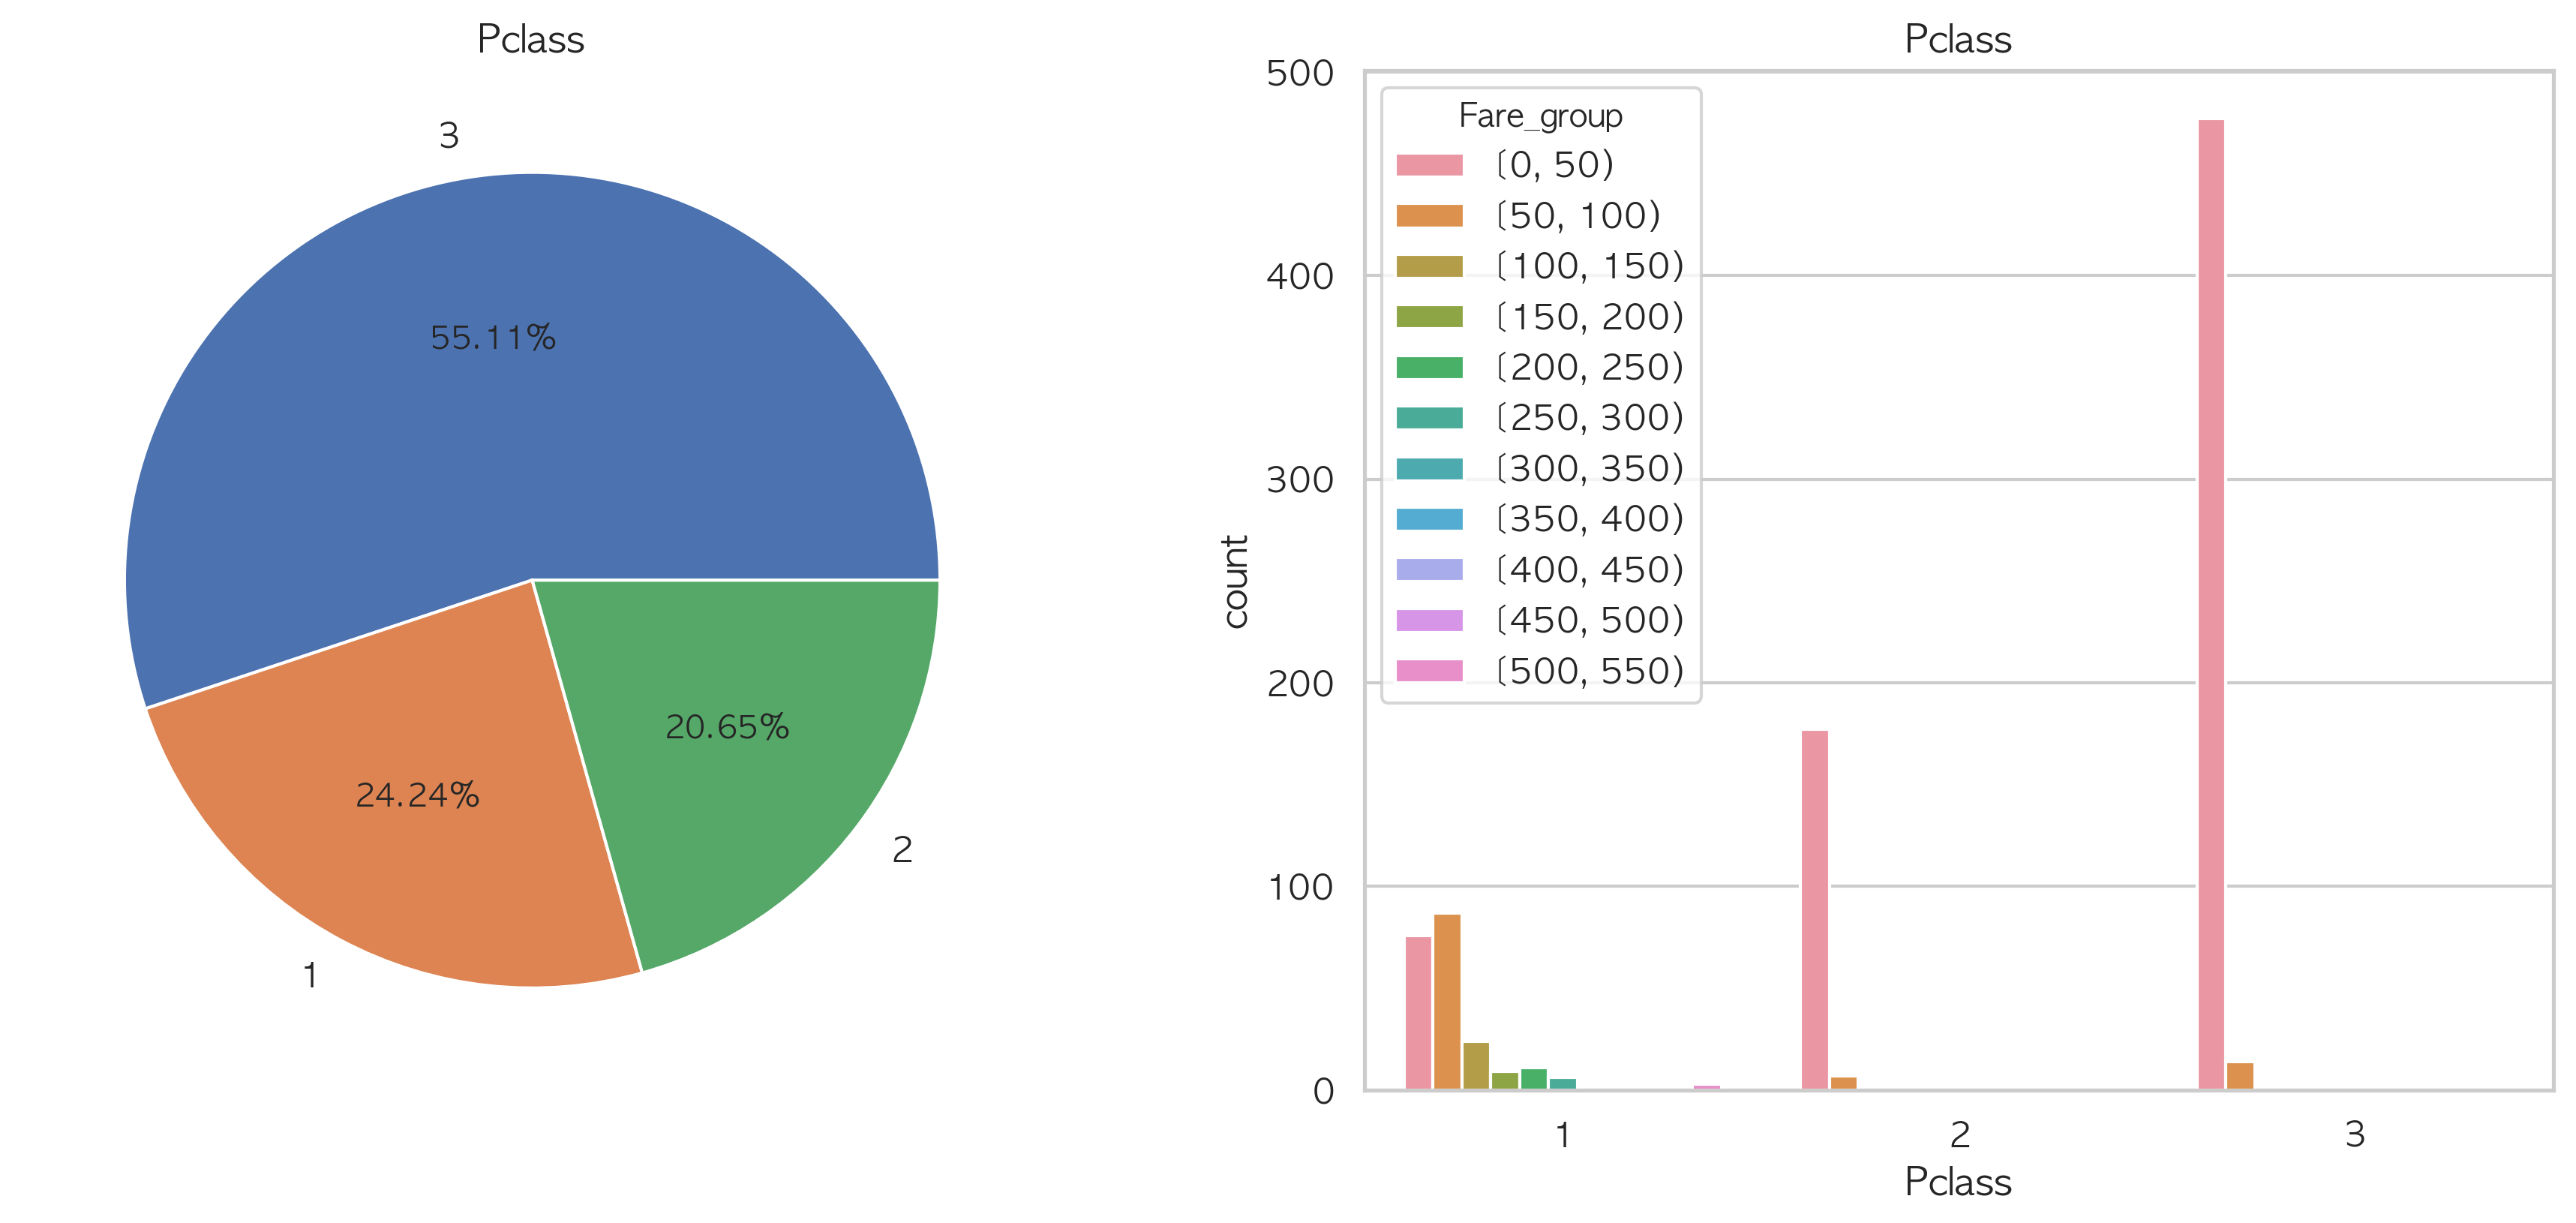

In [25]:
# 객실 요금 대비 객실 등급 확인
# 2,3등급에는 객실요금 100이상은 없음
# 객실 요금도 feature값으로 사용

column_name = "Pclass"
f,ax=plt.subplots(1,2,figsize=(15,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Fare_group", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

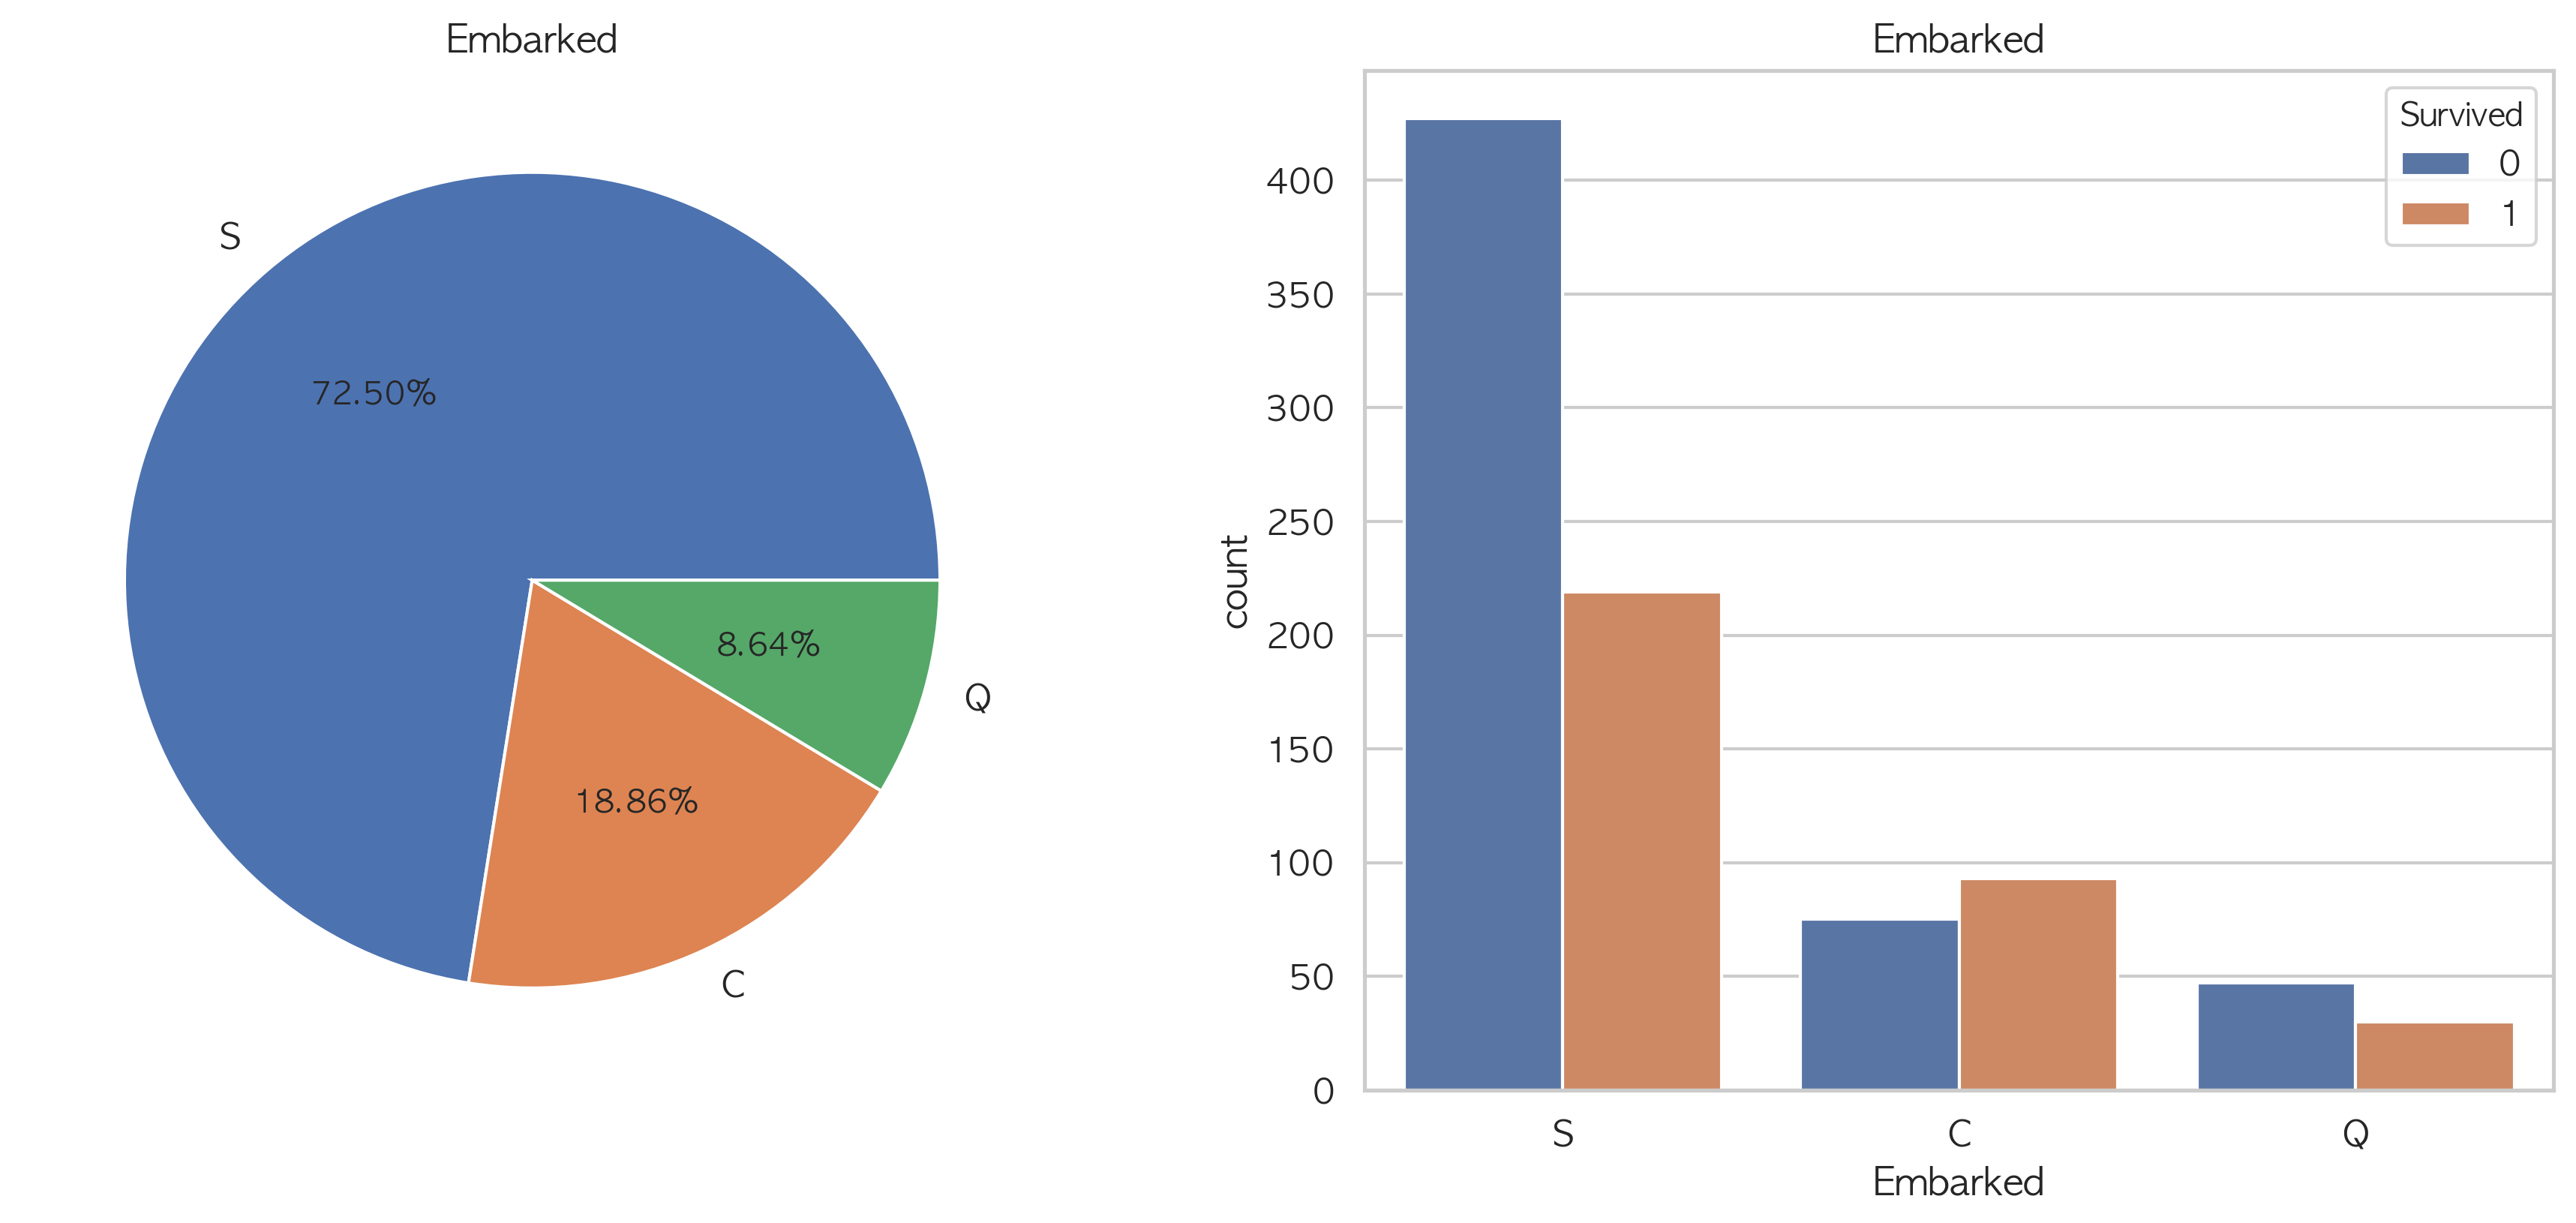

In [26]:
# 탑승 항구별 생존 여부 확인
# S항구 탑승자가 가장 많고, 가장 많이 사망함

column_name = "Embarked"
f,ax=plt.subplots(1,2,figsize=(15,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Survived", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

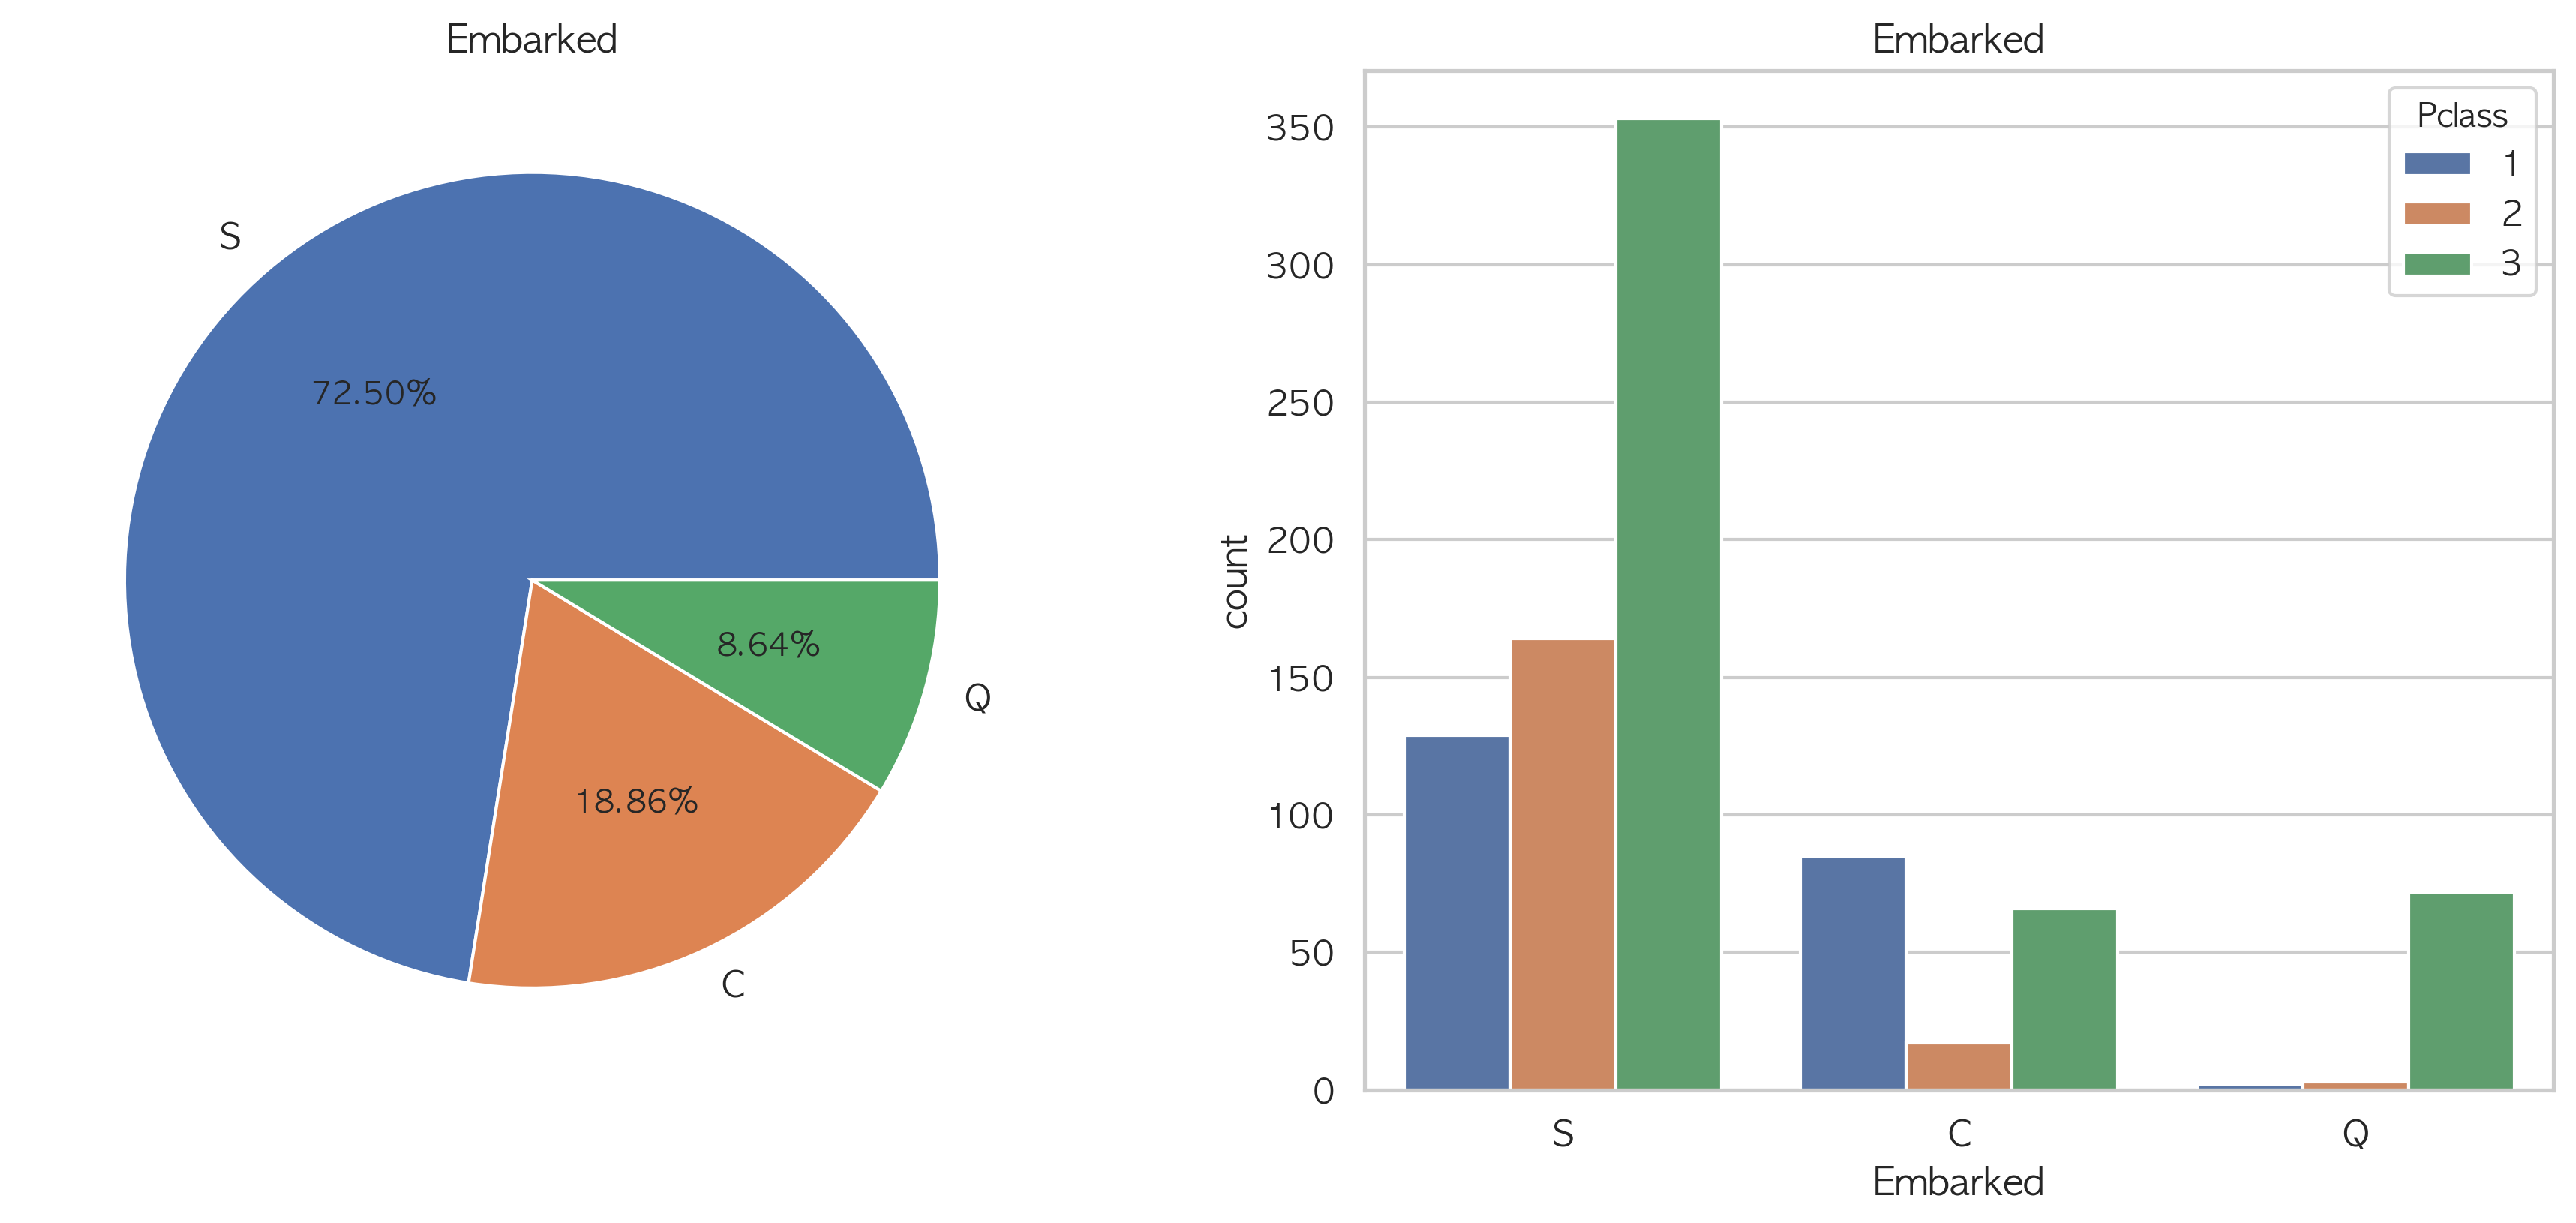

In [27]:
# 탑승항구별 티켓 등급 확인
# S항구가 3등급이 가장 많이 분포
# 탑승항구도 feature값으로 사용하기로 결정

column_name = "Embarked"
f,ax=plt.subplots(1,2,figsize=(15,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="Pclass", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [28]:
# 전체 나이에 따라서는 왜도 > 0이라 왼쪽으로 치우쳐 있었는데,
# 티켓 등급으로 확인해보니 전체적으로 왜도 = 0에 가까움,
# 중앙값, 또는 최빈값이 아닌 평균값으로 채워도 될것 같음,
# 각 티켓 등급별 평균 나이 확인
print("1등석 평균 : {}".format(train[train.Pclass == 1].Age.mean()))
print("2등석 평균 : {}".format(train[train.Pclass == 2].Age.mean()))
print("3등석 평균 : {}".format(train[train.Pclass == 3].Age.mean()))

1등석 평균 : 38.233440860215055
2등석 평균 : 29.87763005780347
3등석 평균 : 25.14061971830986


#### 아래 코드 설명
1. age값이 없는 행의 행번호를 받아서 순서대로 i에 대입하는 방식으로 for문 시작
2. 해당 i행의 티켓등급이 1등급이면
3. 비여 있는 나이에 1등급 평균 나이 대입
4. 해당 i행의 티켓등급이 2등급이면
5. 비여 있는 나이에 2등급 평균 나이 대입
6. 나머지는
7. 비여 있는 나이에 3등급 평균 나이 대입

In [29]:
for i in train.Age[train.Age.isna()].index:
    if train.Pclass.iloc[i] == 1:
        train.Age.iloc[i] = train[train.Pclass == 1].Age.mean()
    elif train.Pclass.iloc[i] == 2:
        train.Age.iloc[i] = train[train.Pclass == 2].Age.mean()
    else:
        train.Age.iloc[i] = train[train.Pclass == 3].Age.mean()

/Users/Ares/anaconda3/envs/pstudy/lib/python3.7/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
# 잘 들어갔는지 나이 결측값 확인
print(train.Age.isna().sum())

0


In [31]:
# train data NaN값 확인
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Age_group      177
Fare_group       0
dtype: int64

In [32]:
# Age_group, Fare_group는 테이터 탐색을 위해 파생한 변수이므로 삭제
del train["Age_group"]
del train["Fare_group"]
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [33]:
# train data NaN값 확인
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
# 위와 다른 방법으로 scikit learn의 Imputer를 사용하여 결측값 채우기 위해 모듈 로드
# from sklearn.preprocessing import Imputer # 이걸로 했을 때 버전 바뀌면서 이름 바뀌었다고 메시지 나와서 다시 아래줄로 로드
from sklearn.impute import SimpleImputer

In [35]:
# test data의 fare 결측값을 최빈값으로 채우기
simpleimputer = SimpleImputer(strategy='most_frequent') # mean(default), median, most_frequent(최빈값), constant(특정값)
test["Fare"] = simpleimputer.fit_transform(test["Fare"].values.reshape(-1,1))

In [36]:
# test data NaN값 확인
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [37]:
for i in test.Age[test.Age.isna()].index:
    if test.Pclass.iloc[i] == 1:
        test.Age.iloc[i] = test[test.Pclass == 1].Age.mean()
    elif test.Pclass.iloc[i] == 2:
        test.Age.iloc[i] = test[test.Pclass == 2].Age.mean()
    else:
        test.Age.iloc[i] = test[test.Pclass == 3].Age.mean()

/Users/Ares/anaconda3/envs/pstudy/lib/python3.7/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
# 최종 결측치 확인
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [39]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [40]:
# 텍스트 범주(sex, emparked)를 숫자 범주, 또는 one-hot encoding 처리하기 위해 데이터프레임 카피
train2 = train.copy()
test2 = test.copy()

In [41]:
# train data 성별 여자 = 0, 남자 = 1로 변경
train2['Sex'] = train2['Sex'].map({'female': 0, 'male': 1})
train2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S


In [42]:
test2.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q


In [43]:
# test data 성별 여자 = 0, 남자 = 1로 변경
test2['Sex'] = test2['Sex'].map({'female': 0, 'male': 1})
test2.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q


In [44]:
# embarked one-hot encoding
# https://www.kaggle.com/jf2333/titanic-solutions-ed327a-one-hot-encoding
from sklearn.preprocessing import OneHotEncoder

In [45]:
train_embarked = train2["Embarked"].values.reshape(-1,1)
test_embarked = test2["Embarked"].values.reshape(-1,1)

In [46]:
onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(train_embarked)
test_OneHotEncoded = onehot_encoder.fit_transform(test_embarked)

In [47]:
train2["Embarked_C"] = train_OneHotEncoded[:,0]
train2["Embarked_Q"] = train_OneHotEncoded[:,1]
train2["Embarked_S"] = train_OneHotEncoded[:,2]
test2["Embarked_C"] = test_OneHotEncoded[:,0]
test2["Embarked_Q"] = test_OneHotEncoded[:,1]
test2["Embarked_S"] = test_OneHotEncoded[:,2]

In [48]:
train2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,7.2500,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,71.2833,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,8.0500,S,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",1,25.14062,0,0,8.4583,Q,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,51.8625,S,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,21.0750,S,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00000,0,2,11.1333,S,0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00000,1,0,30.0708,C,1.0,0.0,0.0


In [49]:
test2.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S,0.0,0.0,1.0
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,9.2250,S,0.0,0.0,1.0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,7.6292,Q,0.0,1.0,0.0
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,29.0000,S,0.0,0.0,1.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,7.2292,C,1.0,0.0,0.0
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,24.1500,S,0.0,0.0,1.0


In [50]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree # tree graph

In [51]:
np.set_printoptions(linewidth=400)    # screen size
np.set_printoptions(threshold=np.inf) # print all numpy out

In [52]:
# 준비된 train 데이터셋을 학습에 사용할 train feature 데이터프레임에 추가(survived 칼럼 제외)
X_train = train2.drop("Survived", axis=1)

In [53]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0.0,0.0,1.0


In [54]:
# 사용하지 않을 칼럼 삭제
del X_train["PassengerId"]
del X_train["Name"]
del X_train["Embarked"]

In [55]:
# 확인
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0


In [56]:
# 학습 결과 확인용 lable만으로 데이터 프레임 제작
Y_train = train2["Survived"]
Y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [57]:
# 위와 같은 방법으로 결과 테스트(예측)를 위한 데이터 프레임 카피
X_test = test2.copy()
X_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q,0.0,1.0,0.0


In [58]:
# 사용하지 않을 칼럼 삭제
del X_test["PassengerId"]
del X_test["Name"]
del X_test["Embarked"]
X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0


In [59]:
# 모델용 데이터 프레임 전체 shape 확인
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [60]:
model = DecisionTreeClassifier().fit(X_train, Y_train)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [61]:
print(Y_train.shape)

(891,)


In [62]:
print(X_train)

     Pclass  Sex       Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         3    1  22.00000      1      0   7.2500         0.0         0.0   
1         1    0  38.00000      1      0  71.2833         1.0         0.0   
2         3    0  26.00000      0      0   7.9250         0.0         0.0   
3         1    0  35.00000      1      0  53.1000         0.0         0.0   
4         3    1  35.00000      0      0   8.0500         0.0         0.0   
..      ...  ...       ...    ...    ...      ...         ...         ...   
886       2    1  27.00000      0      0  13.0000         0.0         0.0   
887       1    0  19.00000      0      0  30.0000         0.0         0.0   
888       3    0  25.14062      1      2  23.4500         0.0         0.0   
889       1    1  26.00000      0      0  30.0000         1.0         0.0   
890       3    1  32.00000      0      0   7.7500         0.0         1.0   

     Embarked_S  
0           1.0  
1           0.0  
2           1.0  
3  

In [63]:
model = DecisionTreeClassifier(
   criterion='gini'  # gini, entropy
,  max_depth=3
    ).fit(X_train, Y_train)

print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [64]:
import graphviz

dot_data = tree.export_graphviz(
    model
,   out_file=None
,   feature_names=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]
,   class_names=['No','Yes']
)

In [65]:
graph = graphviz.Source(dot_data)
#graph.render("decition-tree-entropy-depth-2") 
graph.render("decition-tree-gini-depth-3") 

'decition-tree-gini-depth-3.pdf'

In [66]:
Y_test_Pred = model.predict(X_test)
print(Y_test_Pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]


In [67]:
print("특징중요도(feature importance),변수중요도\n")
importances = model.feature_importances_ 
print("[importance]", importances)

특징중요도(feature importance),변수중요도

[importance] [0.21352543 0.62887964 0.0618669  0.04492651 0.         0.05080152 0.         0.         0.        ]


In [68]:
for importance in importances:
	print(importance)

sorted_importances = np.argsort(importances)
print(sorted_importances)

0.21352543351233416
0.6288796382731139
0.061866895093931874
0.04492651373891922
0.0
0.05080151938170098
0.0
0.0
0.0
[4 6 7 8 3 5 2 0 1]


In [69]:
# columnNames = dfTrain[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']].columns.values
columnNames = X_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]].columns.values
print(columnNames)
print("변수 중요도")
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), columnNames), reverse=True))
padding = np.arange(len(columnNames)) + 0.5

['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q' 'Embarked_S']
변수 중요도
[(0.6289, 'Sex'), (0.2135, 'Pclass'), (0.0619, 'Age'), (0.0508, 'Fare'), (0.0449, 'SibSp'), (0.0, 'Parch'), (0.0, 'Embarked_S'), (0.0, 'Embarked_Q'), (0.0, 'Embarked_C')]


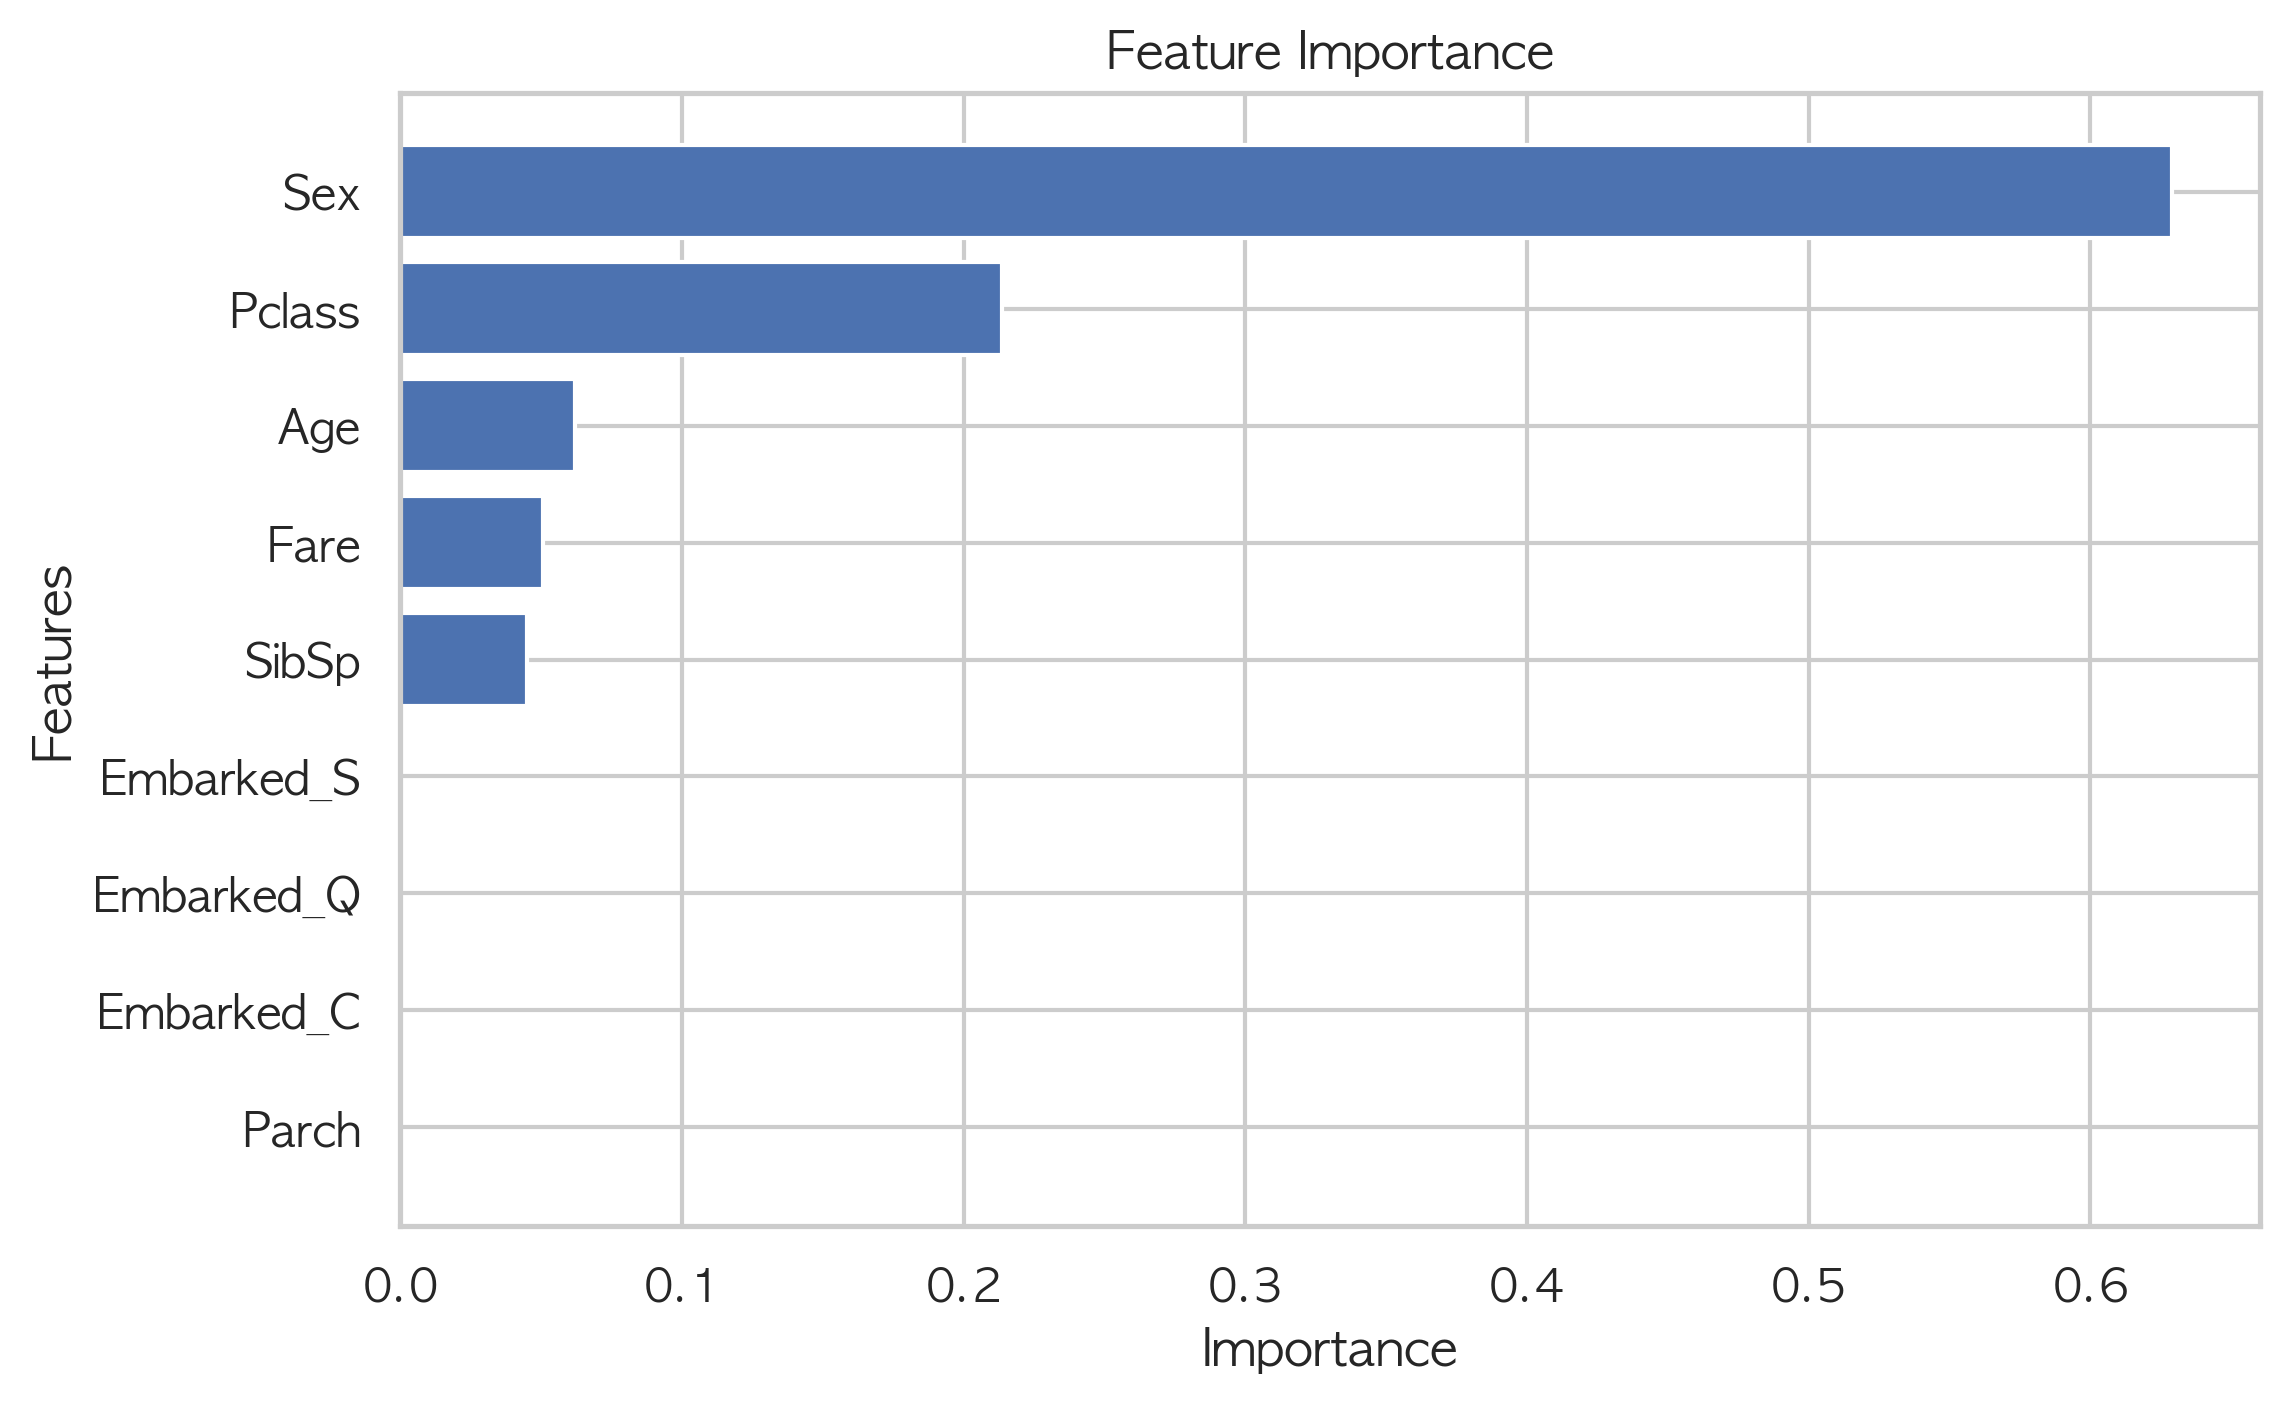

In [70]:
plt.figure(1)
plt.barh(padding, importances[sorted_importances], align='center')
# plt.barh(padding, importances[sorted_importances])
plt.yticks(padding, columnNames[sorted_importances])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### 이하 각 모델별로 acc_log(정확도) 확인

In [72]:
# machine learning 모듈 로드
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Users/Ares/anaconda3/envs/pstudy/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.7

In [74]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/Users/Ares/anaconda3/envs/pstudy/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


88.89

In [75]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [76]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.45

In [77]:
# Perceptron

perceptron = Perceptron(max_iter = 1000)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

67.45

In [78]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/Users/Ares/anaconda3/envs/pstudy/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.01

In [79]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.1

In [80]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [81]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [82]:
# 전체 모델 정확도별 소팅하여 출력

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
8,Decision Tree,98.20
0,Support Vector Machines,88.89
1,KNN,83.95
2,Logistic Regression,80.70
7,Linear SVC,79.01
4,Naive Bayes,78.45
6,Stochastic Gradient Decent,77.10
5,Perceptron,67.45


In [84]:
# Random Forest로 정답제출용 submission 데이터프레임 작성
# 다른 모델로 해보고 싶은 사람은 다른 모델로 해볼 수 있음

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

submission = pd.DataFrame({
        "PassengerId": test2["PassengerId"],
        "Survived": Y_pred
    })
submission.shape

(418, 2)

In [85]:
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [86]:
# 정답제출용 데이터 프레임으로 정답제출 파일 작성
submission.to_csv('submission_rf.csv', index=False)

In [88]:
# 아래는 SVC로 다시 한번 돌려서 정답 파일 작성까지 진행

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

submission = pd.DataFrame({
        "PassengerId": test2["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission_svm.csv', index=False)

/Users/Ares/anaconda3/envs/pstudy/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
